## 0 读取数据

我选择的是 `college` 这个数据集。该数据集包含摘自《美国新闻与世界报道》1995年刊的美国高校统计数据: 

| 数据域名称 | 含义 |
|-----|-----|
| `Private` | 二分变量，以"No"和"Yes"标识私立或公立大学   |
| `Apps` | 收到的申请数量   |
| `Accept` | 录取的申请数量   |
| `Enroll` | 入学新生数量   |
| `Top10perc` | 高中排名前10%的新生百分比   |
| `Top25perc` | 高中排名前25%的新生百分比   |
| `F.Undergrad` | 全日制本科学生人数   |
| `P.Undergrad` | 非全日制本科学生人数   |
| `Outstate` | 外州学生学费   |
| `Room.Board` | 食宿费用   |
| `Books` | 预估书本费用   |
| `Personal` | 预估个人开销   |
| `PhD` | 拥有博士学位的教师比例   |
| `Terminal` | 拥有最高学位的教师比例   |
| `S.F.Ratio` | 师生比例   |
| `perc.alumni` | 捐赠校友比例   |
| `Expend` | 生均教学支出   |
| `Grad.Rate` | 毕业率 |

我们希望了解其他特征域的值对毕业率的影响。

In [17]:
import pandas as pd # type: ignoreselect
college = pd.read_csv('college.csv')

In [18]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将第一列的列明改为 `College`

In [19]:
college.rename({'Unnamed: 0': 'College'}, axis=1, inplace=True)
college.set_index('College', inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将 `Private` 字段映射为 `bool` 值变量

In [21]:
college['Private'] = college['Private'].map({'Yes': True, 'No': False})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


使用 `DataFrame.describe()` 函数获取每个特征域的各统计量

In [25]:
college.describe(include= "all")

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


## 1 

下面对上述 `describe()` 的结果进行分析。

整体概述

这份数据描述了777所美国大学在1995年的各项指标。数据包含分类变量（如Private）和数值变量。describe()函数为数值变量提供了丰富的统计信息，让我们能够快速了解数据的中心趋势、离散程度和分布形态。

分变量详细分析

1. 学校基本属性

* Private
    * 分析： 这是一个分类变量，describe() 显示其唯一值（unique）为2（Yes/No），其中 top 值为 True（即"Yes"），频数（freq）为565。
    * 结论： 数据集中私立大学占绝大多数。565所私立大学 / 777所总数 ≈ 72.7% 的学校是私立的。

2. 招生情况

* Apps（申请数）， Accept（录取数）， Enroll（入学数）

    * 平均数： 平均每所大学收到3001份申请，录取2018人，最终有779人入学。

    * 统计行为：
        * 差异巨大： 三个变量的标准差（std）都非常大，几乎接近甚至超过其平均值（例如Apps的std=3870 > mean=3001）。这表明不同大学的招生规模存在天壤之别。最大值（Apps max=48,094）和最小值（Apps min=81）也印证了这一点。

        * 录取与入学率： 我们可以粗略计算：

            * 平均录取率 = Accept / Apps ≈ 2018 / 3001 ≈ 67.3%

            * 平均入学率/报到率 = Enroll / Accept ≈ 779 / 2018 ≈ 38.6%

        * 分布形态： 中位数（50%）远小于平均数（均值）。例如，Apps的中位数是1558，但均值是3001。这意味着有少量大学拥有极其庞大的申请量（极右偏分布），拉高了整体平均值。大部分大学的申请数集中在较低水平（一半的大学申请数少于1558）。

3. 生源质量

* Top10perc（高中前10%）， Top25perc（高中前25%）

    * 平均数： 平均而言，新生中有27.6%来自高中排名前10%的学生，55.8%来自前25%的学生。

    * 统计行为： 分布相对均匀（标准差小于均值），Top25perc的中位数（54%）和均值（55.8%）很接近，说明分布相对对称。而Top10perc的中位数（23%）低于均值（27.6%），表明存在一些顶尖生源高度集中的大学，使分布轻微右偏。

4. 学生与教师规模

* F.Undergrad（全日制本科）， P.Undergrad（非全日制本科）

    * 平均数： 平均全日制本科生为3699人，非全日制为855人。

    * 统计行为： 同样呈现出极大的差异（标准差很大）。全日制学生的规模分布极右偏（中位数1707 << 均值3699），说明少数大型大学主导了数据。非全日制学生的最大值（21,836）和标准差（1522）表明，不同大学在教学模式上差异显著。

* S.F.Ratio（师生比）

    * 平均数： 平均师生比为14.09（即平均每14名学生对应1名教师）。

    * 统计行为： 分布相对集中（标准差3.96），中位数（13.6）和均值（14.09）接近，大部分学校的师生比在11.5到16.5之间（25%-75%分位数）。

5. 费用与开支

* Outstate（外州学费）， Room.Board（食宿费）， Books（书本费）， Personal（个人开销）， Expend（生均支出）

    * 平均数： 外州学费平均为10,441，食宿费为4,358，书本费为549，个人开销为1,341，生均教学支出为$9,660。

    * 统计行为：

        * 学费和支出差异显著： Outstate和Expend的标准差非常大，表明大学的收费水平和资源投入相差悬殊。Expend的最大值（56,233）是均值（9,660）的5倍多，再次印证了资源的高度不平等。

        * 固定费用相对稳定： Room.Board和Books的分布相对集中，说明这些基础生活成本在不同大学间差异较小。

        * 分布形态： Outstate和Expend的分布明显右偏（中位数 < 均值），说明有一小部分高学费、高支出的精英大学。

6. 师资力量

* PhD（拥有博士学位教师比例）， Terminal（拥有终极学位教师比例）

    * 平均数： 平均72.7%的教师拥有博士学位，79.7%拥有终极学位（通常指本领域的最高学位，如博士、艺术硕士MFA等）。

    * 统计行为： 分布较为集中，大部分大学的教师博士学位比例在62%到85%之间（25%-75%分位数），师资队伍整体素质较高且在不同大学间相对均衡。Terminal的比例普遍高于PhD，这是合理的。

7. 学校成果与声誉

* perc.alumni（捐赠校友比例）

    * 平均数： 平均22.7%的校友会捐款。

    * 统计行为： 分布较为分散，不同大学的校友捐赠文化和忠诚度差异很大。

* Grad.Rate（毕业率）

    * 平均数： 平均毕业率为65.5%。

    * 统计行为：

        * 异常值： 最大值118%是一个明显的异常值，因为毕业率不可能超过100%。这可能是数据录入错误，或者计算方法特殊（例如包含了超期毕业的学生），需要进一步核查。

        * 分布： 剔除异常值影响，毕业率的分布相对正常，中位数（65%）与均值（65.5%）基本一致，表明分布大致对称。但毕业率本身在不同大学间差异不小（标准差17.2%）。

总结

1.  数据构成： 数据集以私立大学为主（72.7%）。
2.  极度不均衡： 大学在规模（申请数、学生人数）和资源（学费、支出）上表现出极端的差异，存在明显的“头部效应”。大部分统计量的平均值都被少数大型/富裕的大学拉高，中位数通常能更好地代表“典型”大学的情况。
3.  招生漏斗： 从申请到录取再到入学，数量大幅减少，平均入学率仅为38.6%。
4.  潜在数据问题： Grad.Rate存在超过100%的异常值，需要在后续分析中处理。
5.  相对稳定的指标： 师生比（S.F.Ratio）、师资博士比例（PhD, Terminal）、基础生活成本（Room.Board, Books）等指标在不同大学间的分布相对集中。

(d) Use the `pd.plotting.scatter_matrix()` function to produce a
scatterplot matrix of the frst columns `[Top10perc, Apps, Enroll]`.
Recall that you can reference a list `C` of columns of a data frame
`A` using `A[C]`.

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

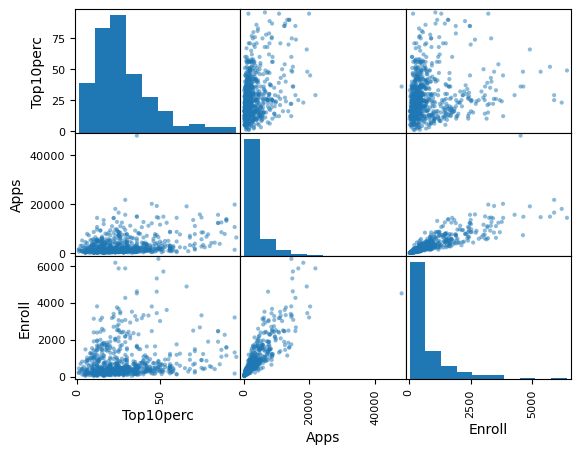

In [30]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]])

(e) Use the `boxplot()` method of `college` to produce side-by-side
boxplots of `Outstate` versus `Private`.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

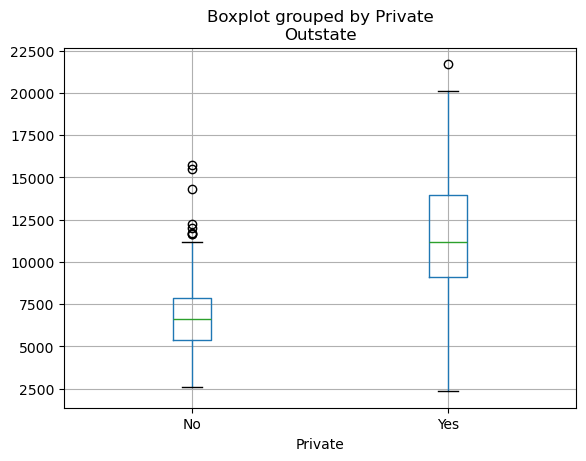

In [31]:
college.boxplot(column='Outstate', by='Private')

(f) Create a new qualitative variable, called `Elite`, by *binning* the
`Top10perc` variable into two groups based on whether or not the
proportion of students coming from the top $10\%$ of their high
school classes exceeds $50\%$.

```python
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])
```

Use the `value_counts()` method of `college['Elite']` to see how
many elite universities there are. Finally, use the `boxplot()` method
again to produce side-by-side boxplots of `Outstate` versus `Elite`.

Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

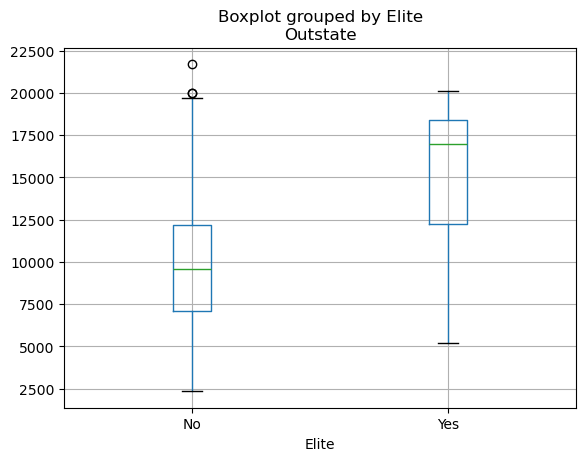

In [32]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])
print(college['Elite'].value_counts())
college.boxplot(column='Outstate', by='Elite')

(g) Use the `plot.hist()` method of `college` to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

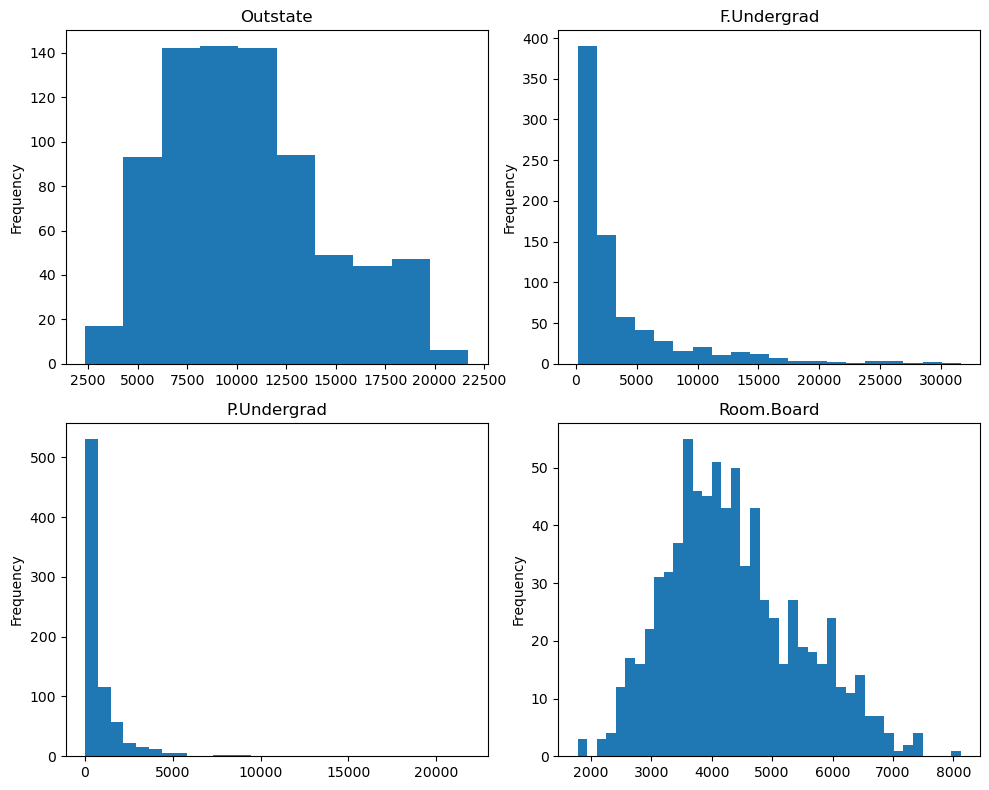

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# generate histplots
college['Outstate'].plot.hist(ax=axs[0, 0], bins=10, title='Outstate')
college['F.Undergrad'].plot.hist(ax=axs[0, 1], bins=20, title='F.Undergrad')
college['P.Undergrad'].plot.hist(ax=axs[1, 0], bins=30, title='P.Undergrad')
college['Room.Board'].plot.hist(ax=axs[1, 1], bins=40, title='Room.Board')

plt.tight_layout()
plt.show()

(h) Continue exploring the data, and provide a brief summary of
what you discover.

In [34]:
import seaborn as sns

college["Private"] = college["Private"].map({'Yes': 1, 'No': 0})
college["Elite"] = college["Elite"].map({'Yes': 1, 'No': 0})
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0


<Axes: >

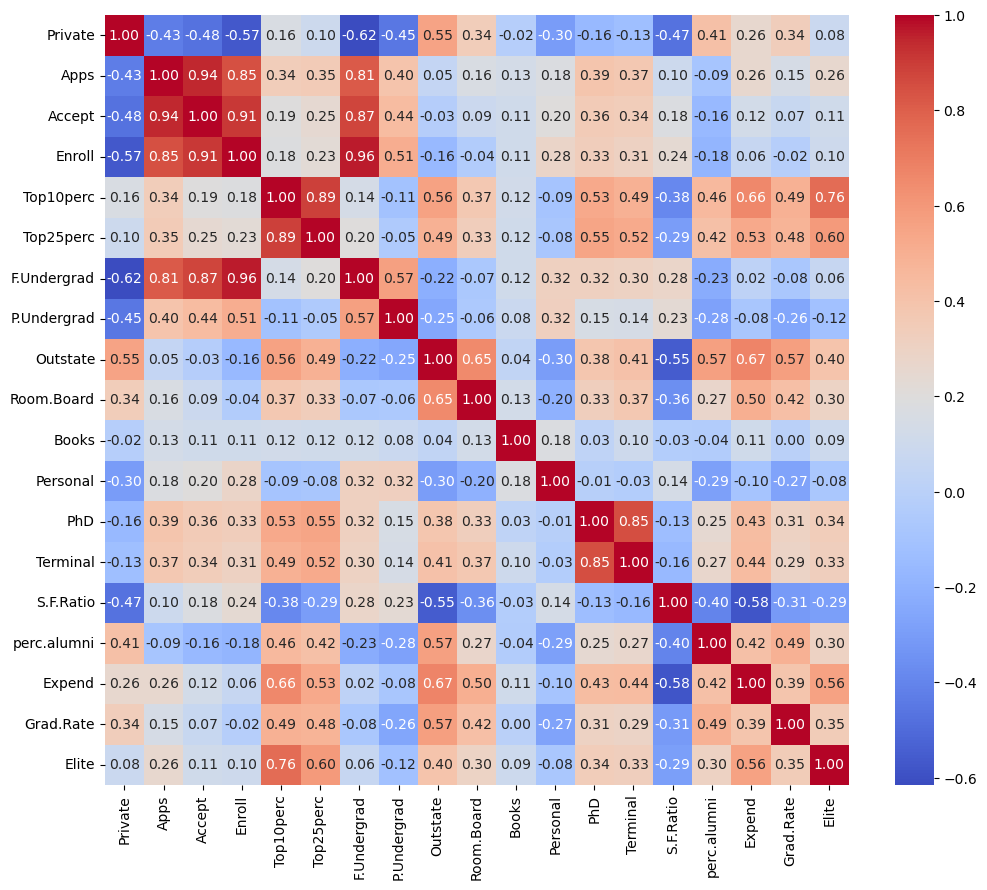

In [73]:
plt.figure(figsize=(12, 10))
sns.heatmap(college.corr(), annot=True, fmt=".2f", cmap='coolwarm')

# 1. apps, accept and enroll are highly correlated
# 2. Top10perc and Top25perc are highly correlated
# 3. F.Undergrad and P.Undergrad are highly correlated
# 4. Books is nearly uncorrelated with all other variables
# 5. Private and Elite are uncorrelated
# 6. PhD and Terminal are highly correlated

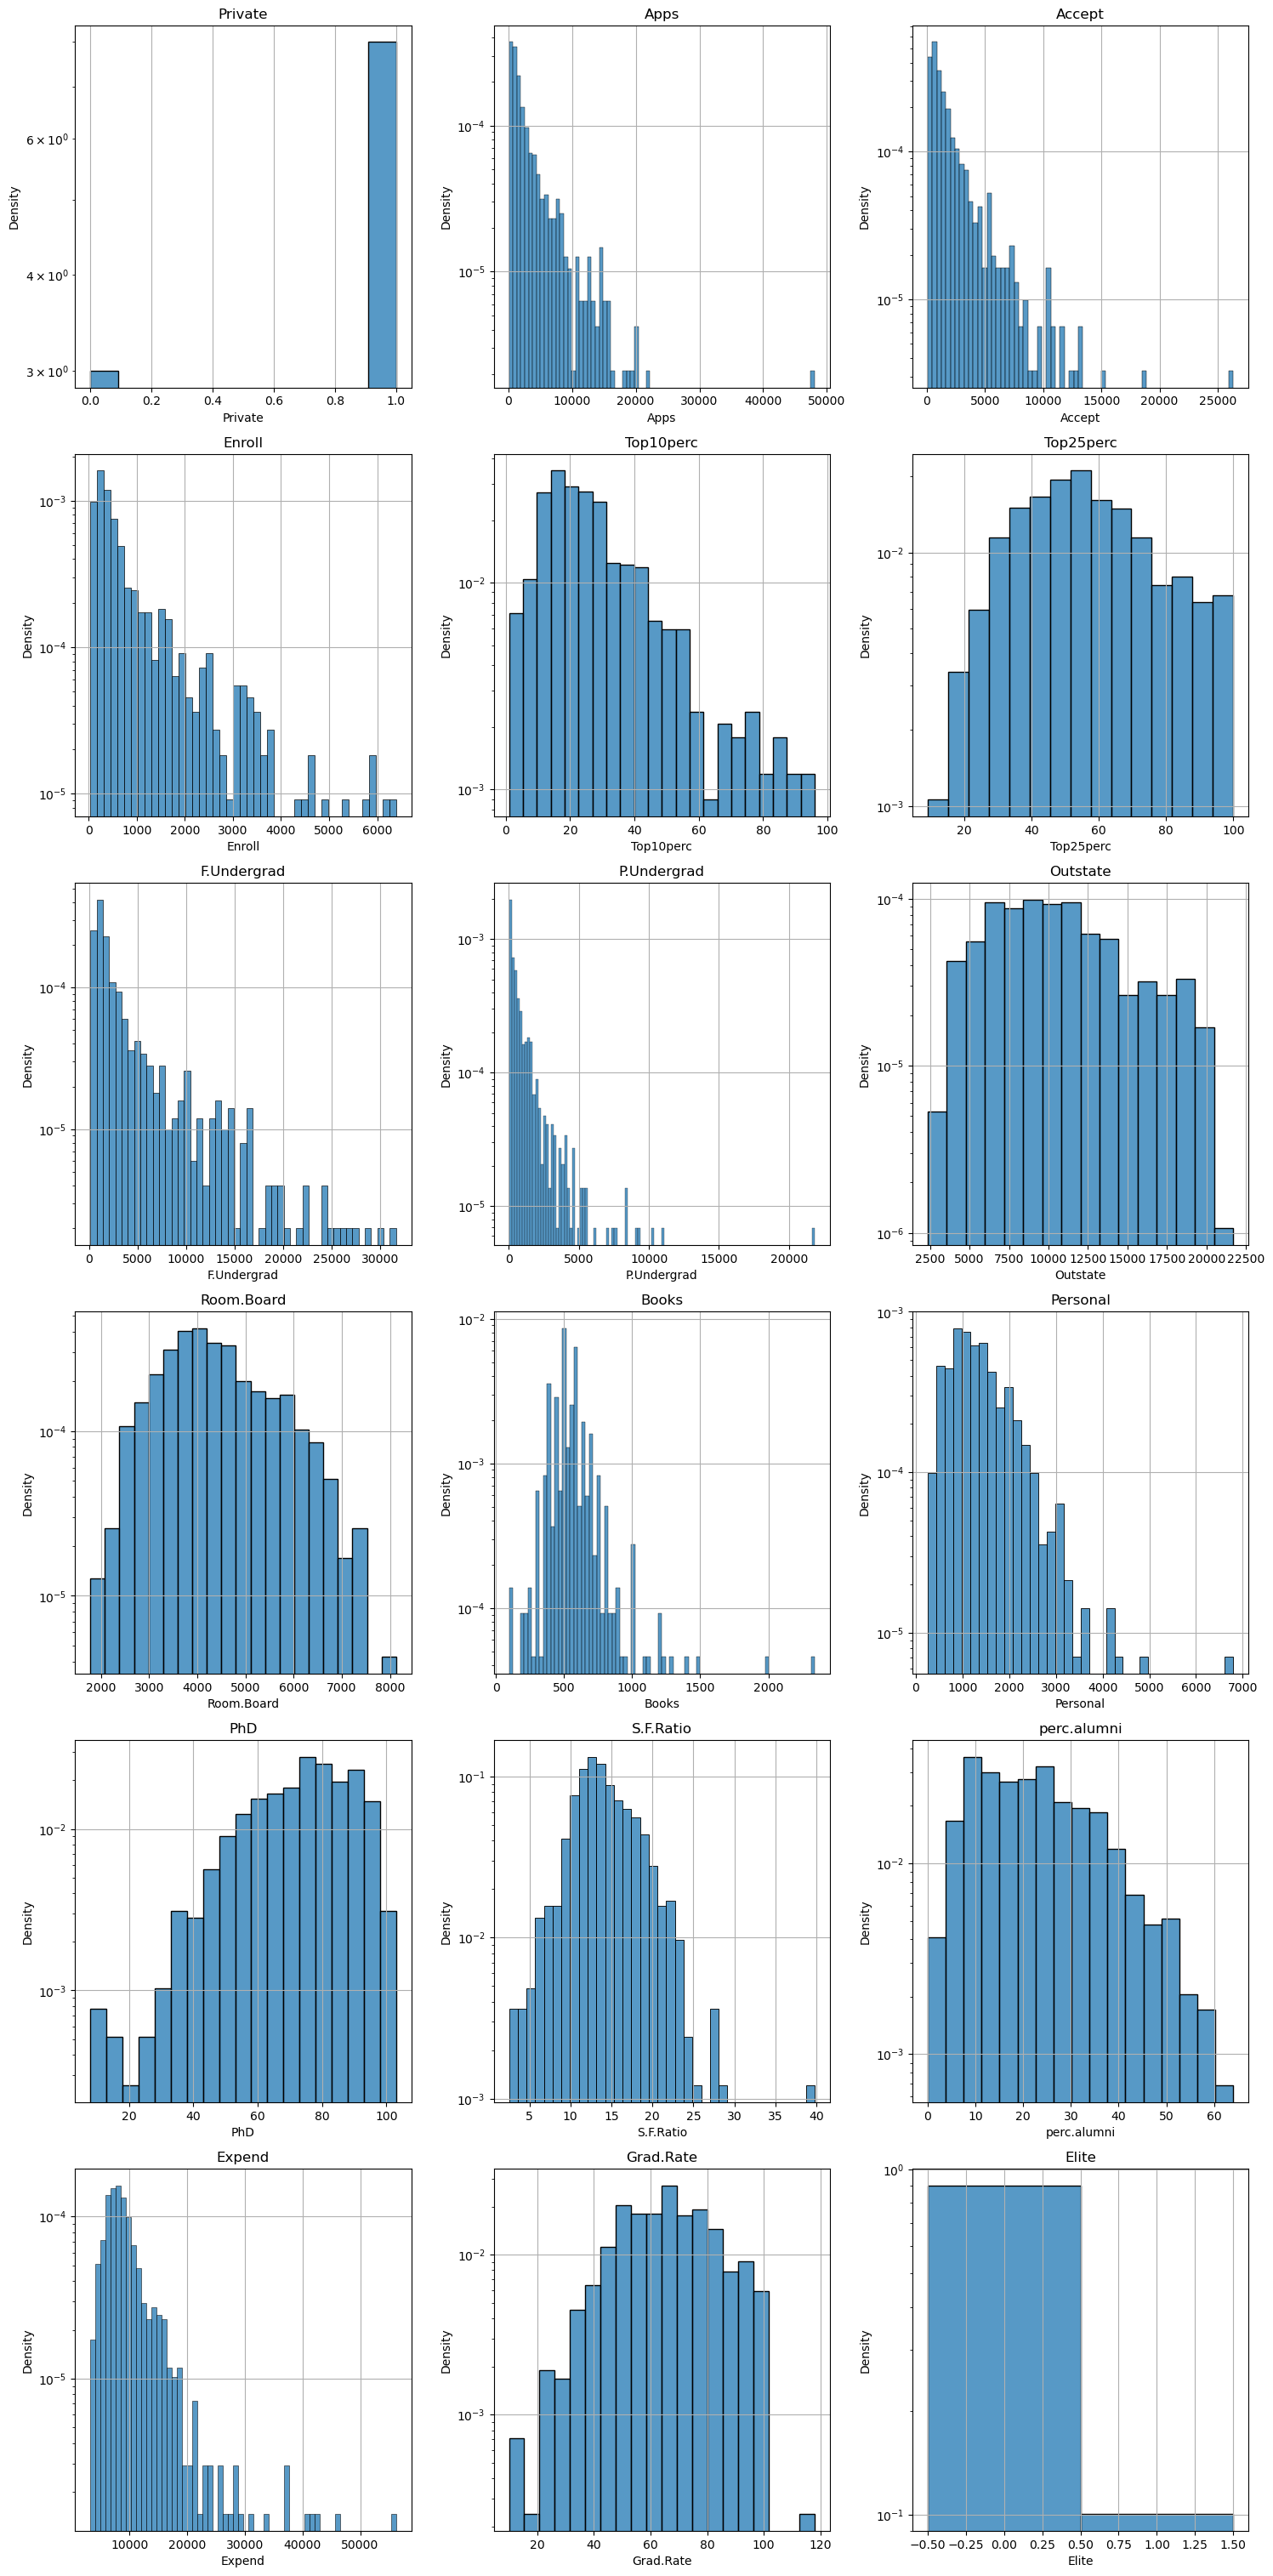

In [ ]:
num_columns = len(college.columns)
num_rows = (num_columns + 2) // 3 
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# draw histograms for each column
for i, column in enumerate(filter(lambda x: "rm" not in x, college.columns)):
    row = i // 3
    col = i % 3
    sns.histplot(college[column], ax=axes[row, col], stat="density")
    axes[row, col].set_title(column)
    axes[row, col].grid()
    axes[row, col].semilogy()

# delete empty subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# 1. highly skewed: 
#     - Apps, Accept, Enroll, Top10perc, F.Undergrad, P.Undergrad, Books, Persoal, expend
# 2. nearly normal:
#    - Outstate, Room.Board, S.F.Ratio

#### Ex. 2.10

(a) To begin, load in the Boston data set, which is part of the ISLP
library.

In [36]:
from ISLP import load_data

boston_dataset = load_data('Boston')
boston_dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [37]:
boston_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [38]:
print(f"Num of Columns: {len(boston_dataset.columns)}")
print(f"Num of Rows: {len(boston_dataset)}")
# The columns are features of the houses in Boston, such as crime rate, average number of rooms etc.
# The rows are the different houses in Boston.

Num of Columns: 13
Num of Rows: 506


(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your fndings.

C:\Users\Gravitas\AppData\Local\Temp\ipykernel_42320\261302007.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(boston_dataset[['crim', 'rm', 'age', 'dis', 'tax']], ax=ax);


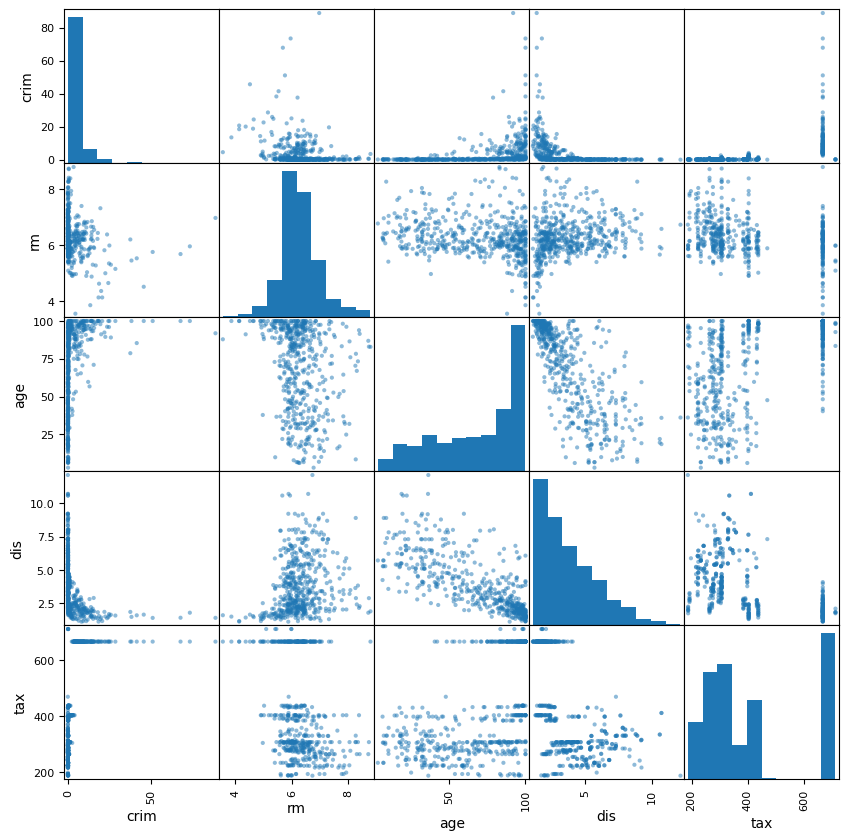

In [39]:
ax = plt.figure(figsize=(10, 10)).gca()
pd.plotting.scatter_matrix(boston_dataset[['crim', 'rm', 'age', 'dis', 'tax']], ax=ax);

# one can see that the crime rate is seemly uncorrelated to other columns
# the age of the house seems to be linearly correlated with the distance
# the number of rooms is linearly correlated with the distance and distance

(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

<Axes: >

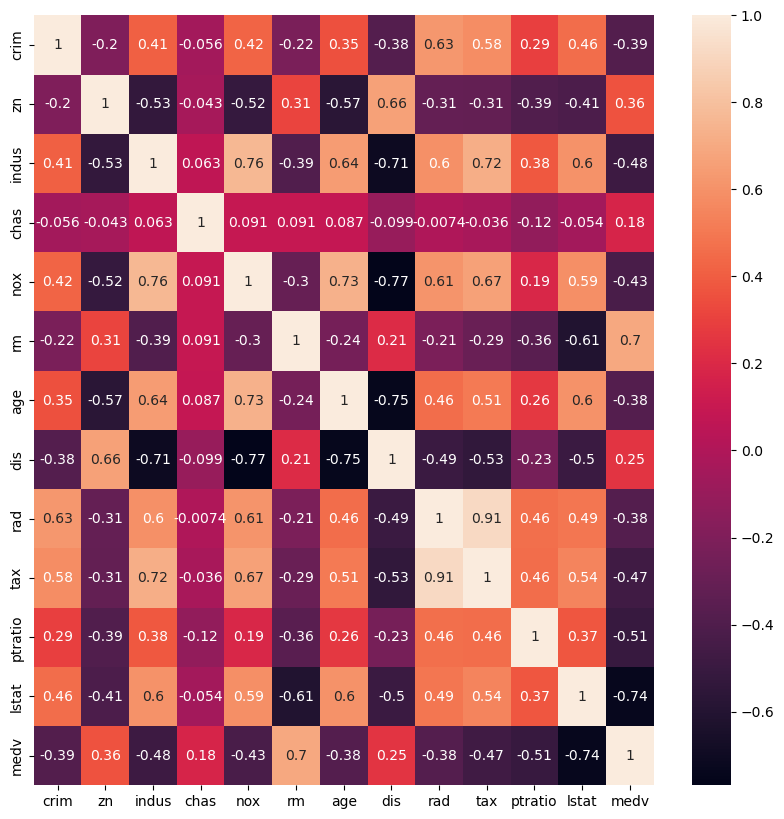

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(boston_dataset.corr(), annot=True)

# from the correlation matrix, we can see that the crime rate is positively correlated with
# - rad (0.63)
# - tax (0.58)
# - lstat (0.46)
# - nox (0.42)
# - indus (0.41)
# and is negatively corelated with medv (-0.39).

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

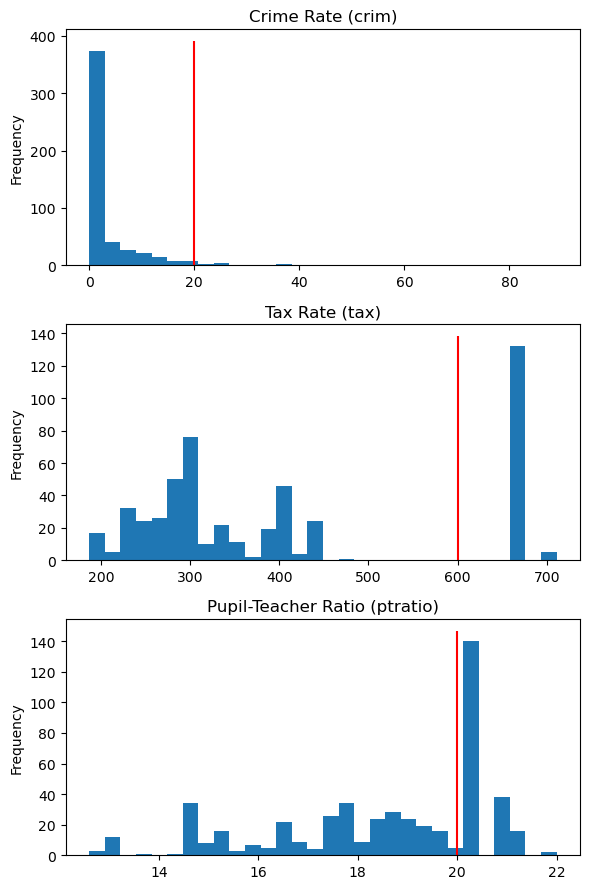

In [41]:
# we first plot the distributions of the aforementioned columns

import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6, 9))

boston_dataset['crim'].plot.hist(ax=axs[0], bins=30, title='Crime Rate (crim)')
axs[0].vlines(20, *axs[0].get_ylim(), color='red')

boston_dataset['tax'].plot.hist(ax=axs[1], bins=30, title='Tax Rate (tax)')
axs[1].vlines(600, *axs[1].get_ylim(), color='red')

boston_dataset['ptratio'].plot.hist(ax=axs[2], bins=30, title='Pupil-Teacher Ratio (ptratio)')
axs[2].vlines(20, *axs[2].get_ylim(), color='red')


plt.tight_layout()
plt.show()

# one can see that the crime rate is mostly low, we set 20 as the threshold
# the tas rate can be divided into two clusters, one is high and the other is low, we set 600 as the threshold
# the pupil-teacher ratio is scattered from approximately 5 to 22, we set 20 as the threshold

In [42]:
boston_dataset['high_crim'] = pd.cut(boston_dataset['crim'],
                          [0,20,100],
                          labels=['No', 'Yes'])
boston_dataset["high_tax"] = pd.cut(boston_dataset['tax'],
                            [0,600,1000],
                            labels=['No', 'Yes'])
boston_dataset["high_ptratio"] = pd.cut(boston_dataset['ptratio'],
                            [0,20,100],
                            labels=['No', 'Yes'])

print(boston_dataset['high_crim'].value_counts())
print(boston_dataset['high_tax'].value_counts())
print(boston_dataset['high_ptratio'].value_counts())

high_crim
No     488
Yes     18
Name: count, dtype: int64
high_tax
No     369
Yes    137
Name: count, dtype: int64
high_ptratio
No     305
Yes    201
Name: count, dtype: int64


(f) How many of the suburbs in this data set bound the Charles
river?

In [43]:
num_suburbs_bound_charles = boston_dataset['chas'].sum()

print(f"Number of suburbs that bound the Charles river: {num_suburbs_bound_charles}")

Number of suburbs that bound the Charles river: 35


(g) What is the median pupil-teacher ratio among the towns in this
data set?

In [44]:
boston_dataset['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

(h) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your fndings.

In [45]:
boston_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [46]:
# the suburbs with lowest median value are as follows

lowest_medv_rows = boston_dataset[boston_dataset["medv"] == boston_dataset["medv"].min()]
lowest_medv_rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,high_crim,high_tax,high_ptratio
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0,Yes,Yes,Yes
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0,Yes,Yes,Yes


In [47]:
# lower the pandas float display precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# display the percentile of the other feature columns w.r.t. the whole dataset
boston_dataset.rank(pct=True).iloc[lowest_medv_rows.index]

# the two suburbs have the high crime rate, nitrogen oxides concentration,
# age, accessibility to radial highways, tax, and population.
# They have low number of rooms, distances to employment centers. 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,high_crim,high_tax,high_ptratio
398,0.99,0.37,0.76,0.47,0.84,0.08,0.96,0.06,0.87,0.86,0.75,0.98,0.00,0.98,0.87,0.80
405,1.00,0.37,0.76,0.47,0.84,0.14,0.96,0.04,0.87,0.86,0.75,0.90,0.00,0.98,0.87,0.80


(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [48]:
# more than 7 rooms on average
rm_more_than_7 = boston_dataset[boston_dataset['rm'] > 7]
rm_more_than_7

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,high_crim,high_tax,high_ptratio
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,4.03,34.70,No,No,No
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,5.33,36.20,No,No,No
40,0.03,75.00,2.95,0,0.43,7.02,15.80,5.40,3,252,18.30,1.98,34.90,No,No,No
55,0.01,90.00,1.22,0,0.40,7.25,21.90,8.70,5,226,17.90,4.81,35.40,No,No,No
64,0.02,17.50,1.38,0,0.42,7.10,59.50,9.22,3,216,18.60,8.05,33.00,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47,0.00,18.10,1,0.72,8.78,82.90,1.90,24,666,20.20,5.29,21.90,No,Yes,Yes
370,6.54,0.00,18.10,1,0.63,7.02,97.50,1.20,24,666,20.20,2.96,50.00,No,Yes,Yes
375,19.61,0.00,18.10,0,0.67,7.31,97.90,1.32,24,666,20.20,13.44,15.00,No,Yes,Yes
453,8.25,0.00,18.10,0,0.71,7.39,99.30,2.45,24,666,20.20,16.74,17.80,No,Yes,Yes


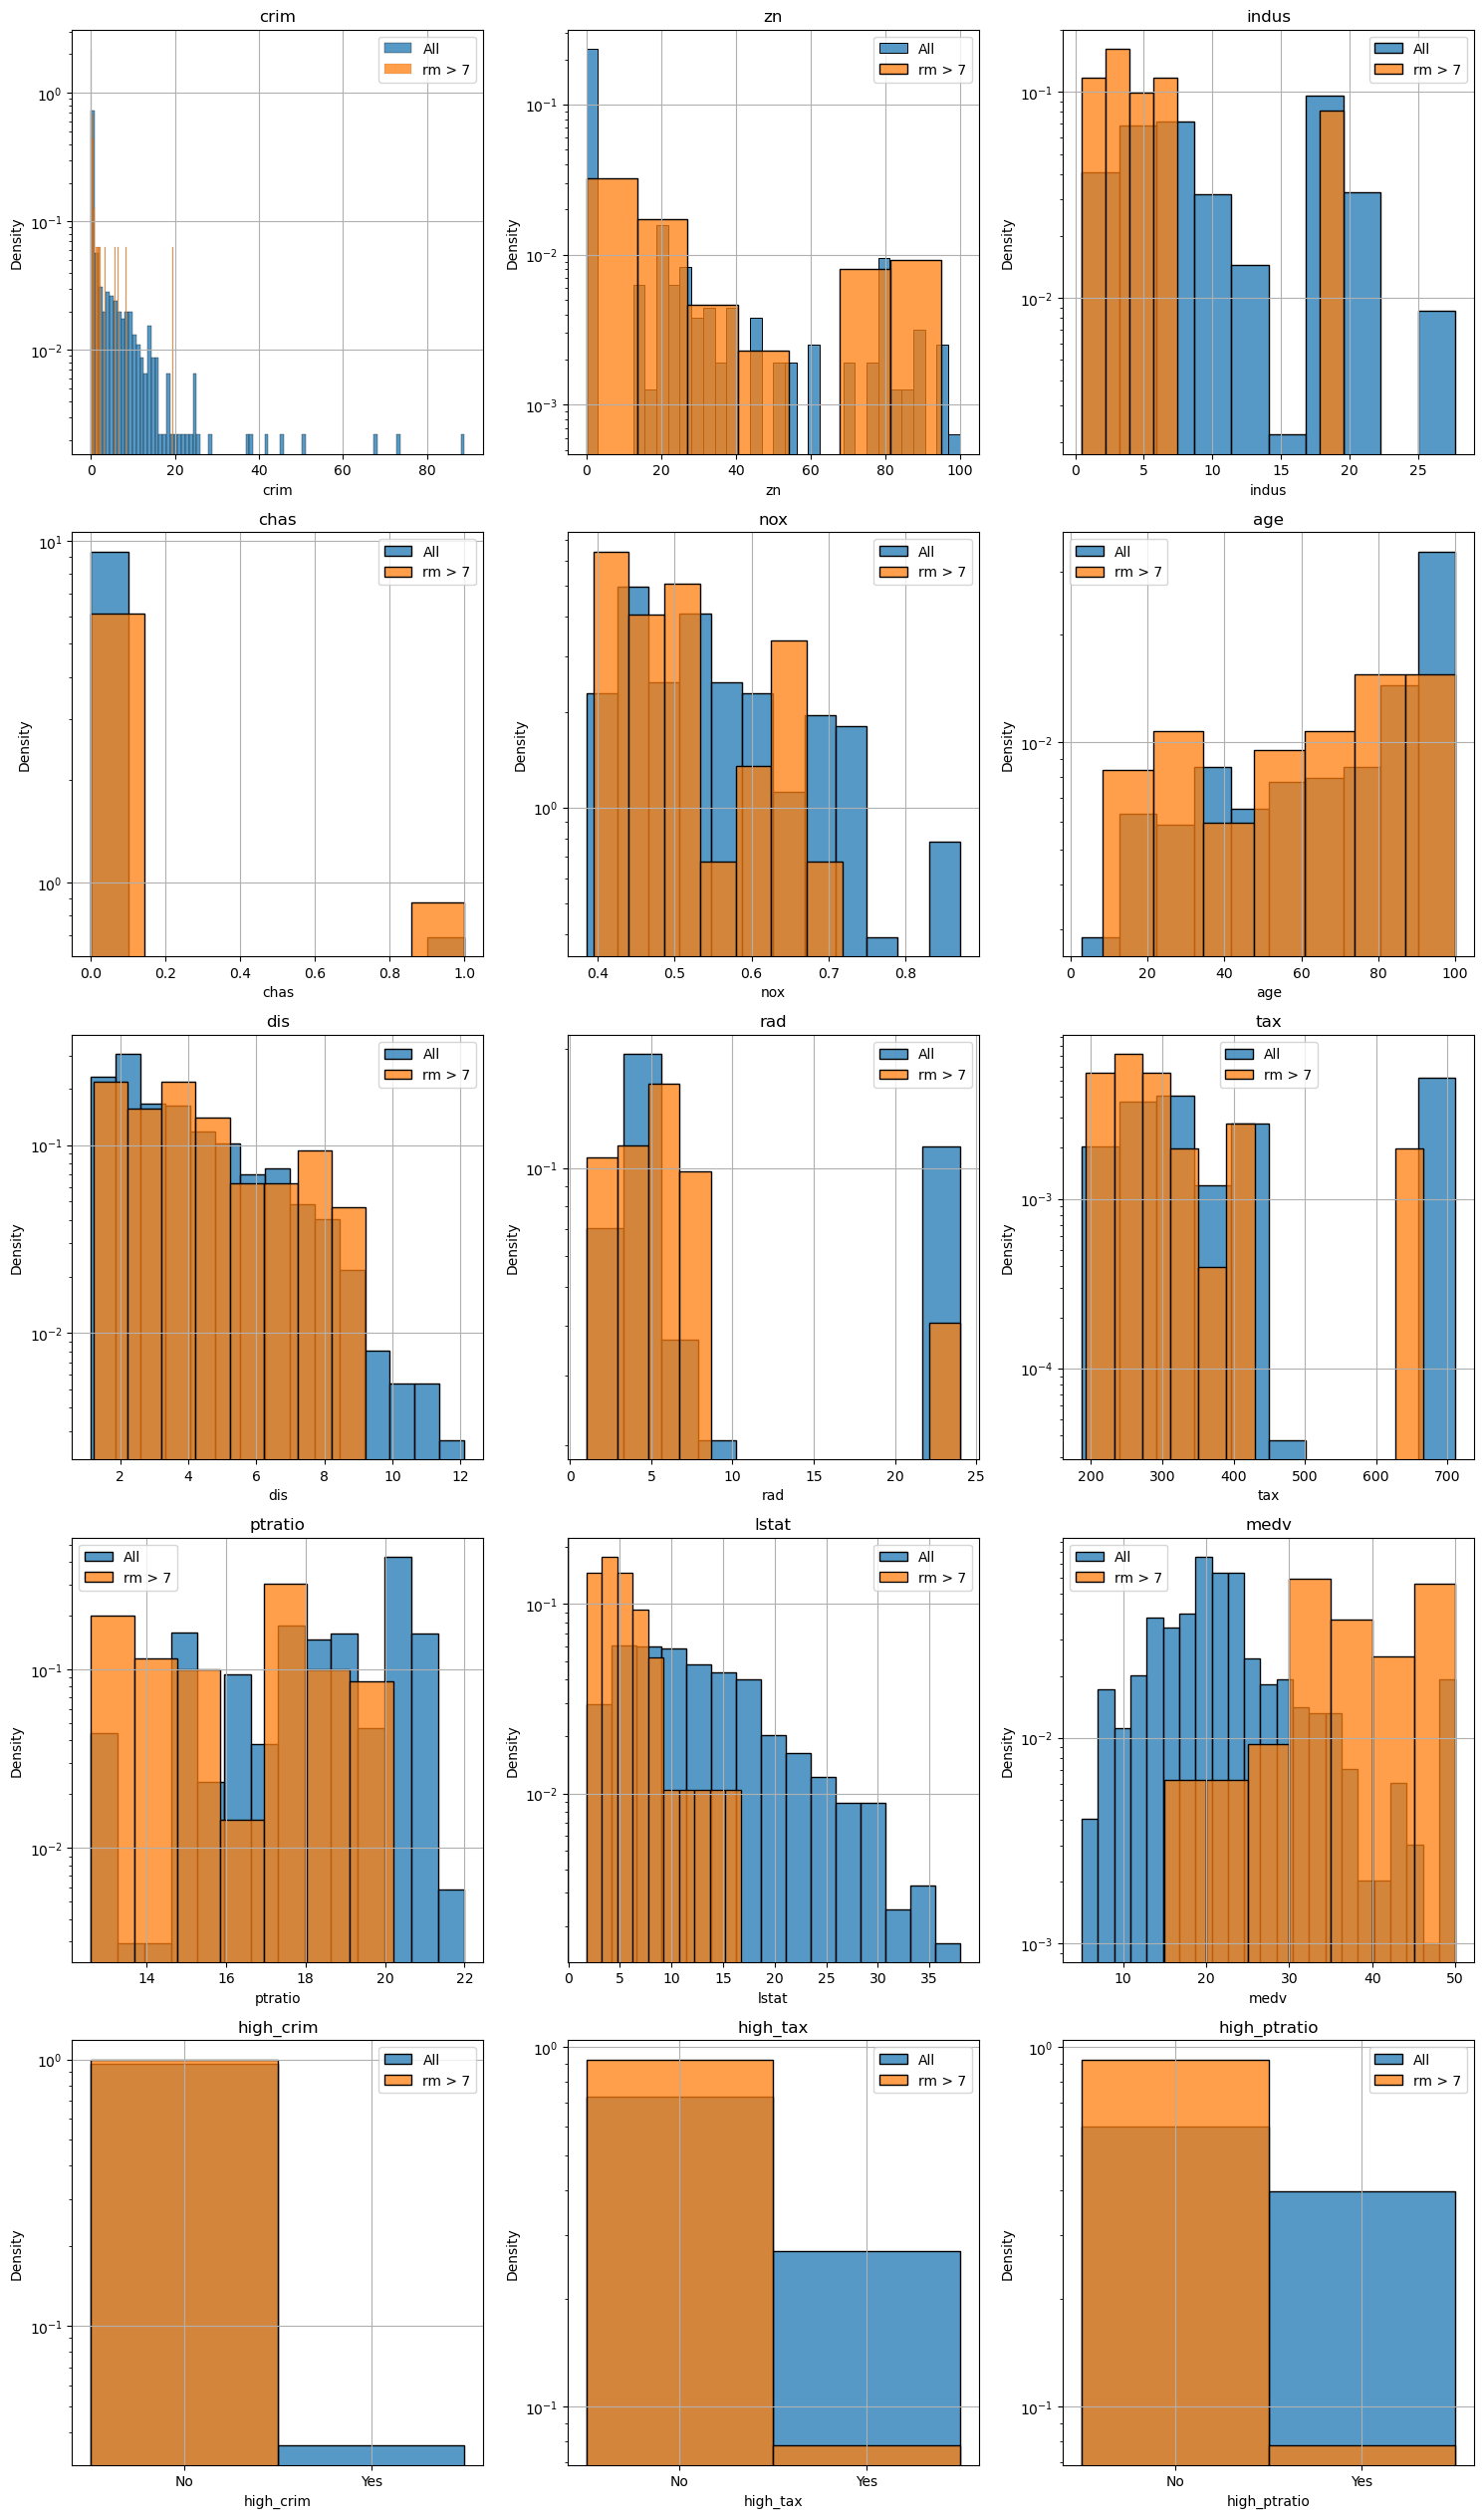

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

num_columns = len(boston_dataset.columns)
num_rows = (num_columns + 2) // 3 
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# draw histograms for each column
for i, column in enumerate(filter(lambda x: "rm" not in x, boston_dataset.columns)):
    row = i // 3
    col = i % 3
    sns.histplot(boston_dataset[column], ax=axes[row, col], label="All", stat="density")
    axes[row, col].set_title(column)
    sns.histplot(rm_more_than_7[column], ax=axes[row, col], label="rm > 7", stat="density")
    axes[row, col].set_title(column)
    axes[row, col].legend()
    axes[row, col].grid()
    axes[row, col].semilogy()

# delete empty subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# one can see that the crime rate of suburbs with more than 7 rooms on average have
# - lower crime rate
# - lower proportion of non-retail business acres per town
# - lower nitric oxides concentration
# - lower pupil-teacher ratio
# - lower status of the population
# - higher median value of owner-occupied homes

In [50]:
# more than 8 rooms on average
rm_more_than_8 = boston_dataset[boston_dataset['rm'] > 8]
rm_more_than_8

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,high_crim,high_tax,high_ptratio
97,0.12,0.00,2.89,0,0.45,8.07,76.00,3.50,2,276,18.00,4.21,38.70,No,No,No
163,1.52,0.00,19.58,1,0.60,8.38,93.90,2.16,5,403,14.70,3.32,50.00,No,No,No
204,0.02,95.00,2.68,0,0.42,8.03,31.90,5.12,4,224,14.70,2.88,50.00,No,No,No
224,0.32,0.00,6.20,0,0.50,8.27,78.30,2.89,8,307,17.40,4.14,44.80,No,No,No
225,0.53,0.00,6.20,0,0.50,8.72,83.00,2.89,8,307,17.40,4.63,50.00,No,No,No
226,0.38,0.00,6.20,0,0.50,8.04,86.50,3.22,8,307,17.40,3.13,37.60,No,No,No
232,0.58,0.00,6.20,0,0.51,8.34,73.30,3.84,8,307,17.40,2.47,41.70,No,No,No
233,0.33,0.00,6.20,0,0.51,8.25,70.40,3.65,8,307,17.40,3.95,48.30,No,No,No
253,0.37,22.00,5.86,0,0.43,8.26,8.40,8.91,7,330,19.10,3.54,42.80,No,No,No
257,0.61,20.00,3.97,0,0.65,8.70,86.90,1.80,5,264,13.00,5.12,50.00,No,No,No


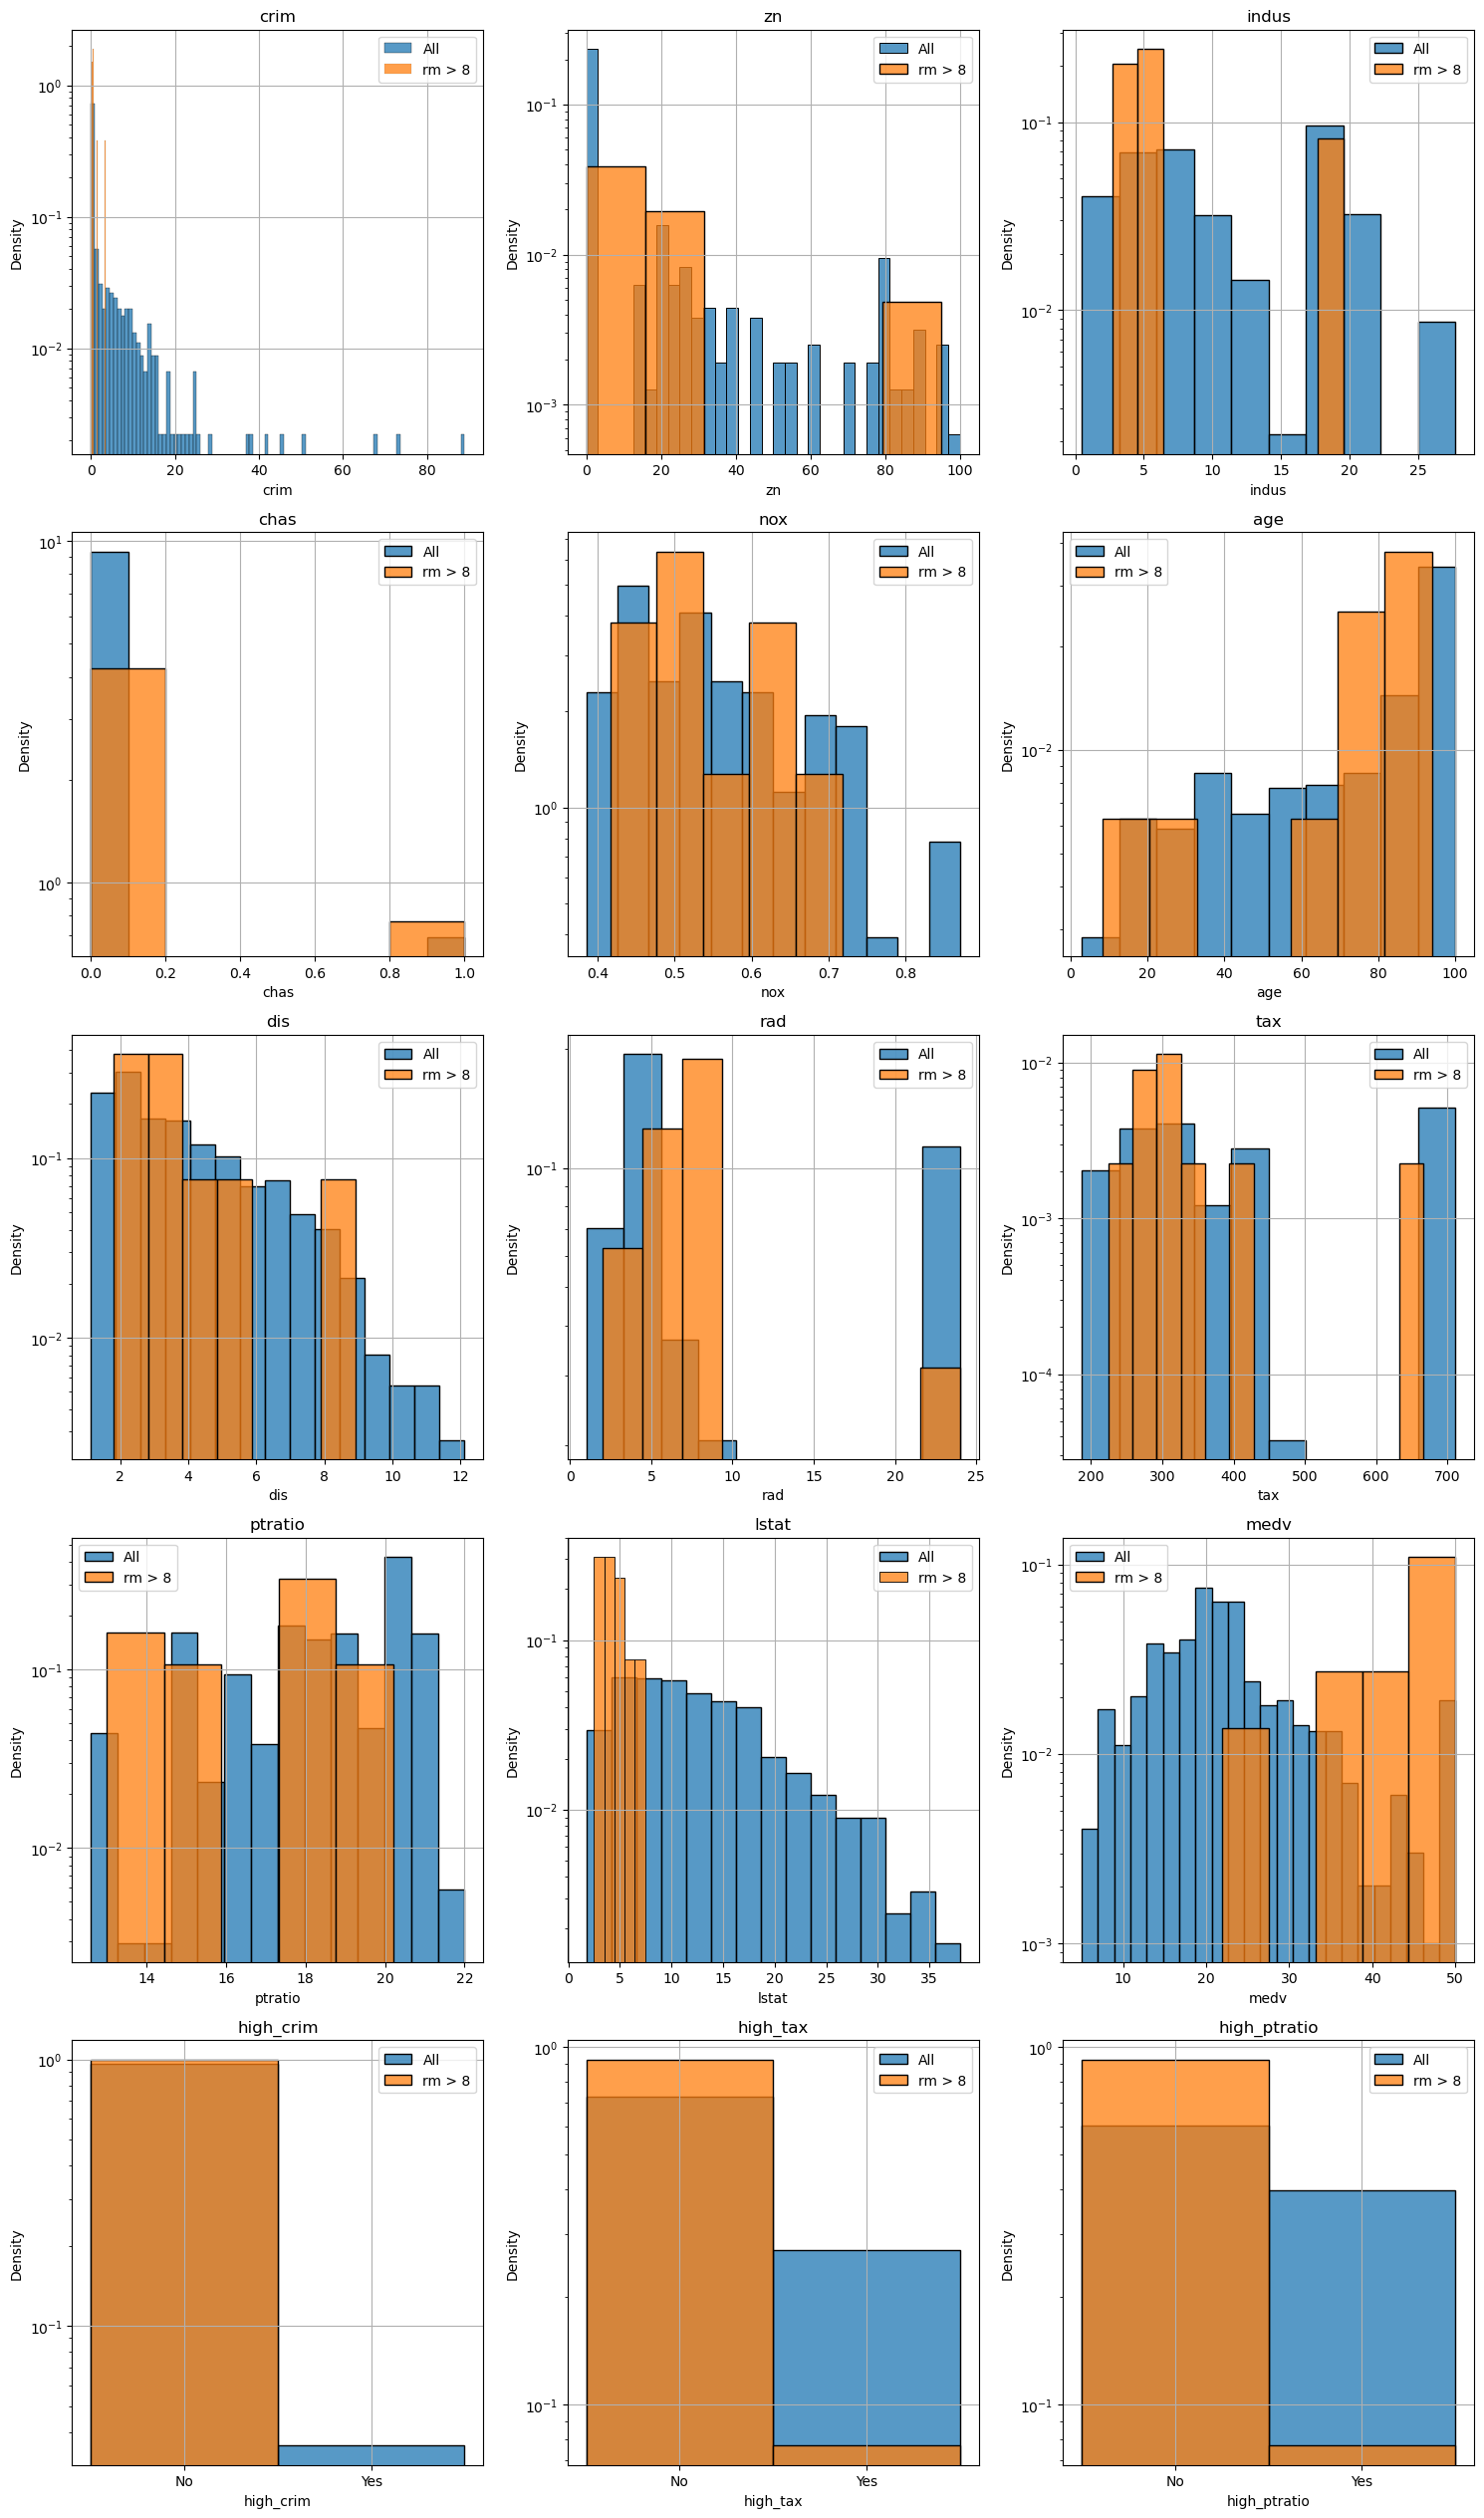

In [51]:
num_columns = len(boston_dataset.columns)
num_rows = (num_columns + 2) // 3  # 每行显示3个子图
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# draw histograms for each column
for i, column in enumerate(filter(lambda x: "rm" not in x, boston_dataset.columns)):
    row = i // 3
    col = i % 3
    sns.histplot(boston_dataset[column], ax=axes[row, col], label="All", stat="density")
    axes[row, col].set_title(column)
    sns.histplot(rm_more_than_8[column], ax=axes[row, col], label="rm > 8", stat="density")
    axes[row, col].set_title(column)
    axes[row, col].legend()
    axes[row, col].grid()
    axes[row, col].semilogy()

# delete empty subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# one can see that the crime rate of suburbs with more than 7 rooms on average have
# - lower crime rate
# - much lower proportion of residential land zoned
# - much lower proportion of non-retail business acres per town
# - lower distances to employment centers
# - lower nitric oxides concentration
# - lower pupil-teacher ratio
# - much lower status of the population
# - much lower median value of owner-occupied homes

---

### Chapter 3 Linear Regression

#### Ex. 3.8

This question involves the use of simple linear regression on the `Auto`
data set.

(a) Use the `smf.OLS()` function to perform a simple linear regression
with `mpg` as the response and `horsepower` as the predictor. Use
the `summarize()` function to print the results. Comment on the
output. For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted `mpg` associated with a `horsepower` of
98? What are the associated 95 % confdence and prediction
intervals?


In [52]:
from ISLP import load_data

auto_dataset = load_data('Auto')
auto_dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [53]:
import statsmodels.api as smf

X = auto_dataset["horsepower"]
y = auto_dataset["mpg"]

X = smf.add_constant(X)
model = smf.OLS(y, X).fit()

model.summary()

# predictor(horsepower) has a relationship with the response(mpg)
# The relationship is strong (very low F-statistic p-value)
# The relationship is negative (negative coefficient)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        22:35:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model.predict([1, 98])

array([24.46707715])

In [55]:
model.get_prediction([1, 98]).summary_frame(alpha=0.05)
# the confident 95% confident interval is [23.97, 24.96]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.47,0.25,23.97,24.96,14.81,34.12



(b) Plot the response and the predictor in a new set of axes `ax`. Use
the `ax.axline()` method or the `abline()` function defned in the
lab to display the least squares regression line.


In [56]:
model.params

const        39.94
horsepower   -0.16
dtype: float64

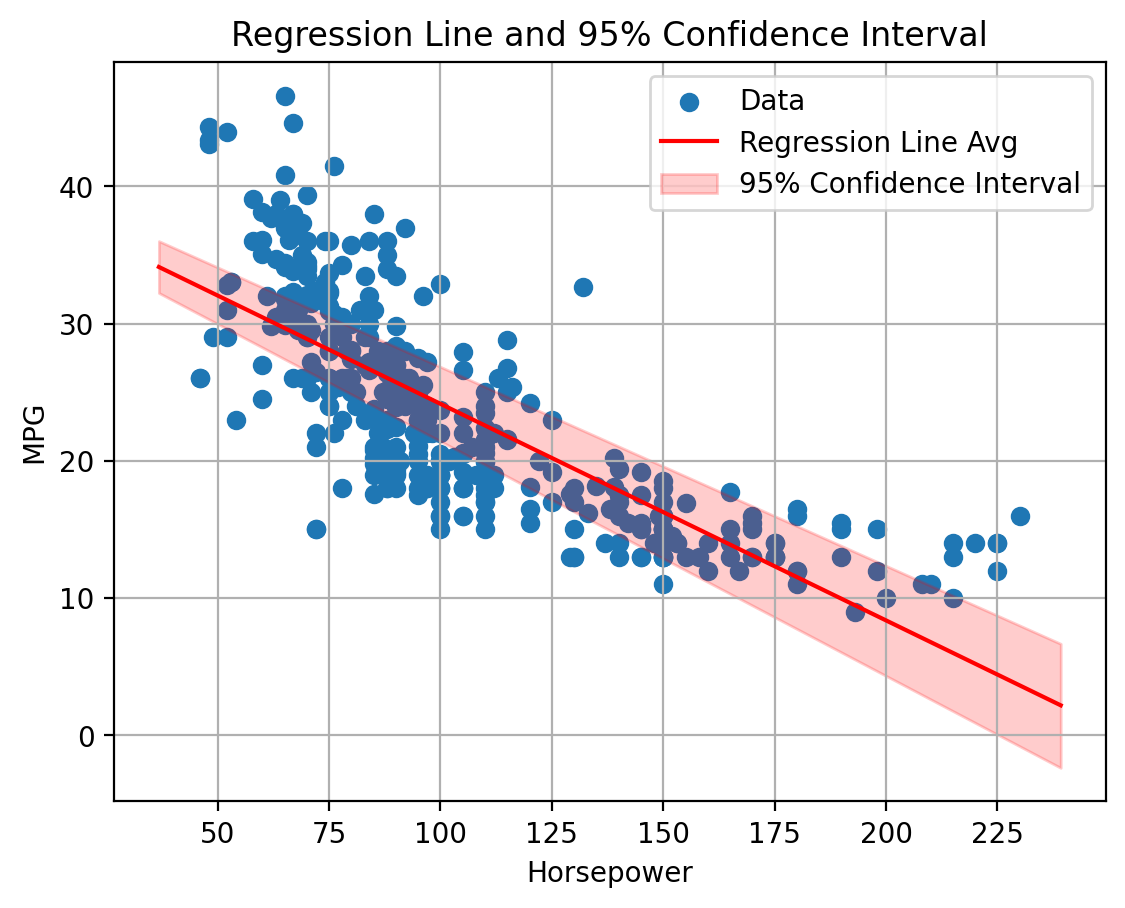

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.scatter(auto_dataset["horsepower"], auto_dataset["mpg"], label='Data');
xlim_tuple = plt.gca().get_xlim()
plt.plot(xlim_tuple, [model.params.iloc[0] + model.params.iloc[1] * x for x in xlim_tuple], color='red', label='Regression Line Avg');

pred_summary = model.summary()
pred_low = [38.525 + -0.171 * x for x in xlim_tuple]
pred_high = [41.347 + -0.145 * x for x in xlim_tuple]
plt.fill_between(xlim_tuple, pred_low, pred_high, color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('Regression Line and 95% Confidence Interval')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

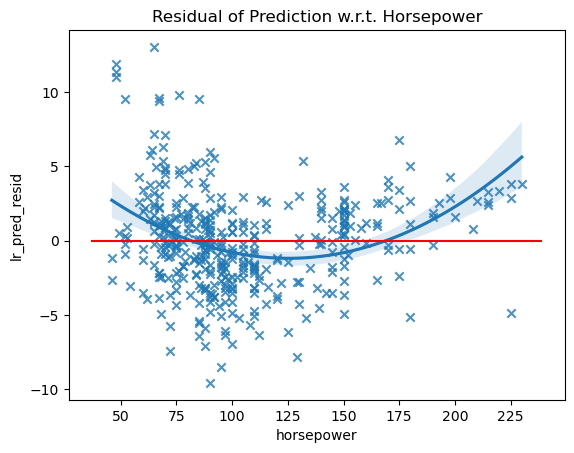

In [194]:
auto_dataset["lr_pred_resid"] = model.resid

plt.title("Residual of Prediction w.r.t. Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Prediction Residual")
sns.regplot(x=auto_dataset["horsepower"], y=auto_dataset["lr_pred_resid"], order=2, marker='x')
plt.hlines(0, *plt.gca().get_xlim(), colors="red")

# one can see that the residual of the prediction lies along a curve.
# Thus the data may be underfitted, we shall increases the dof of the model
# for instance, we can add higher order polynomials to the model. 

#### Ex. 3.9

This question involves the use of multiple linear regression on the
`Auto` data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.


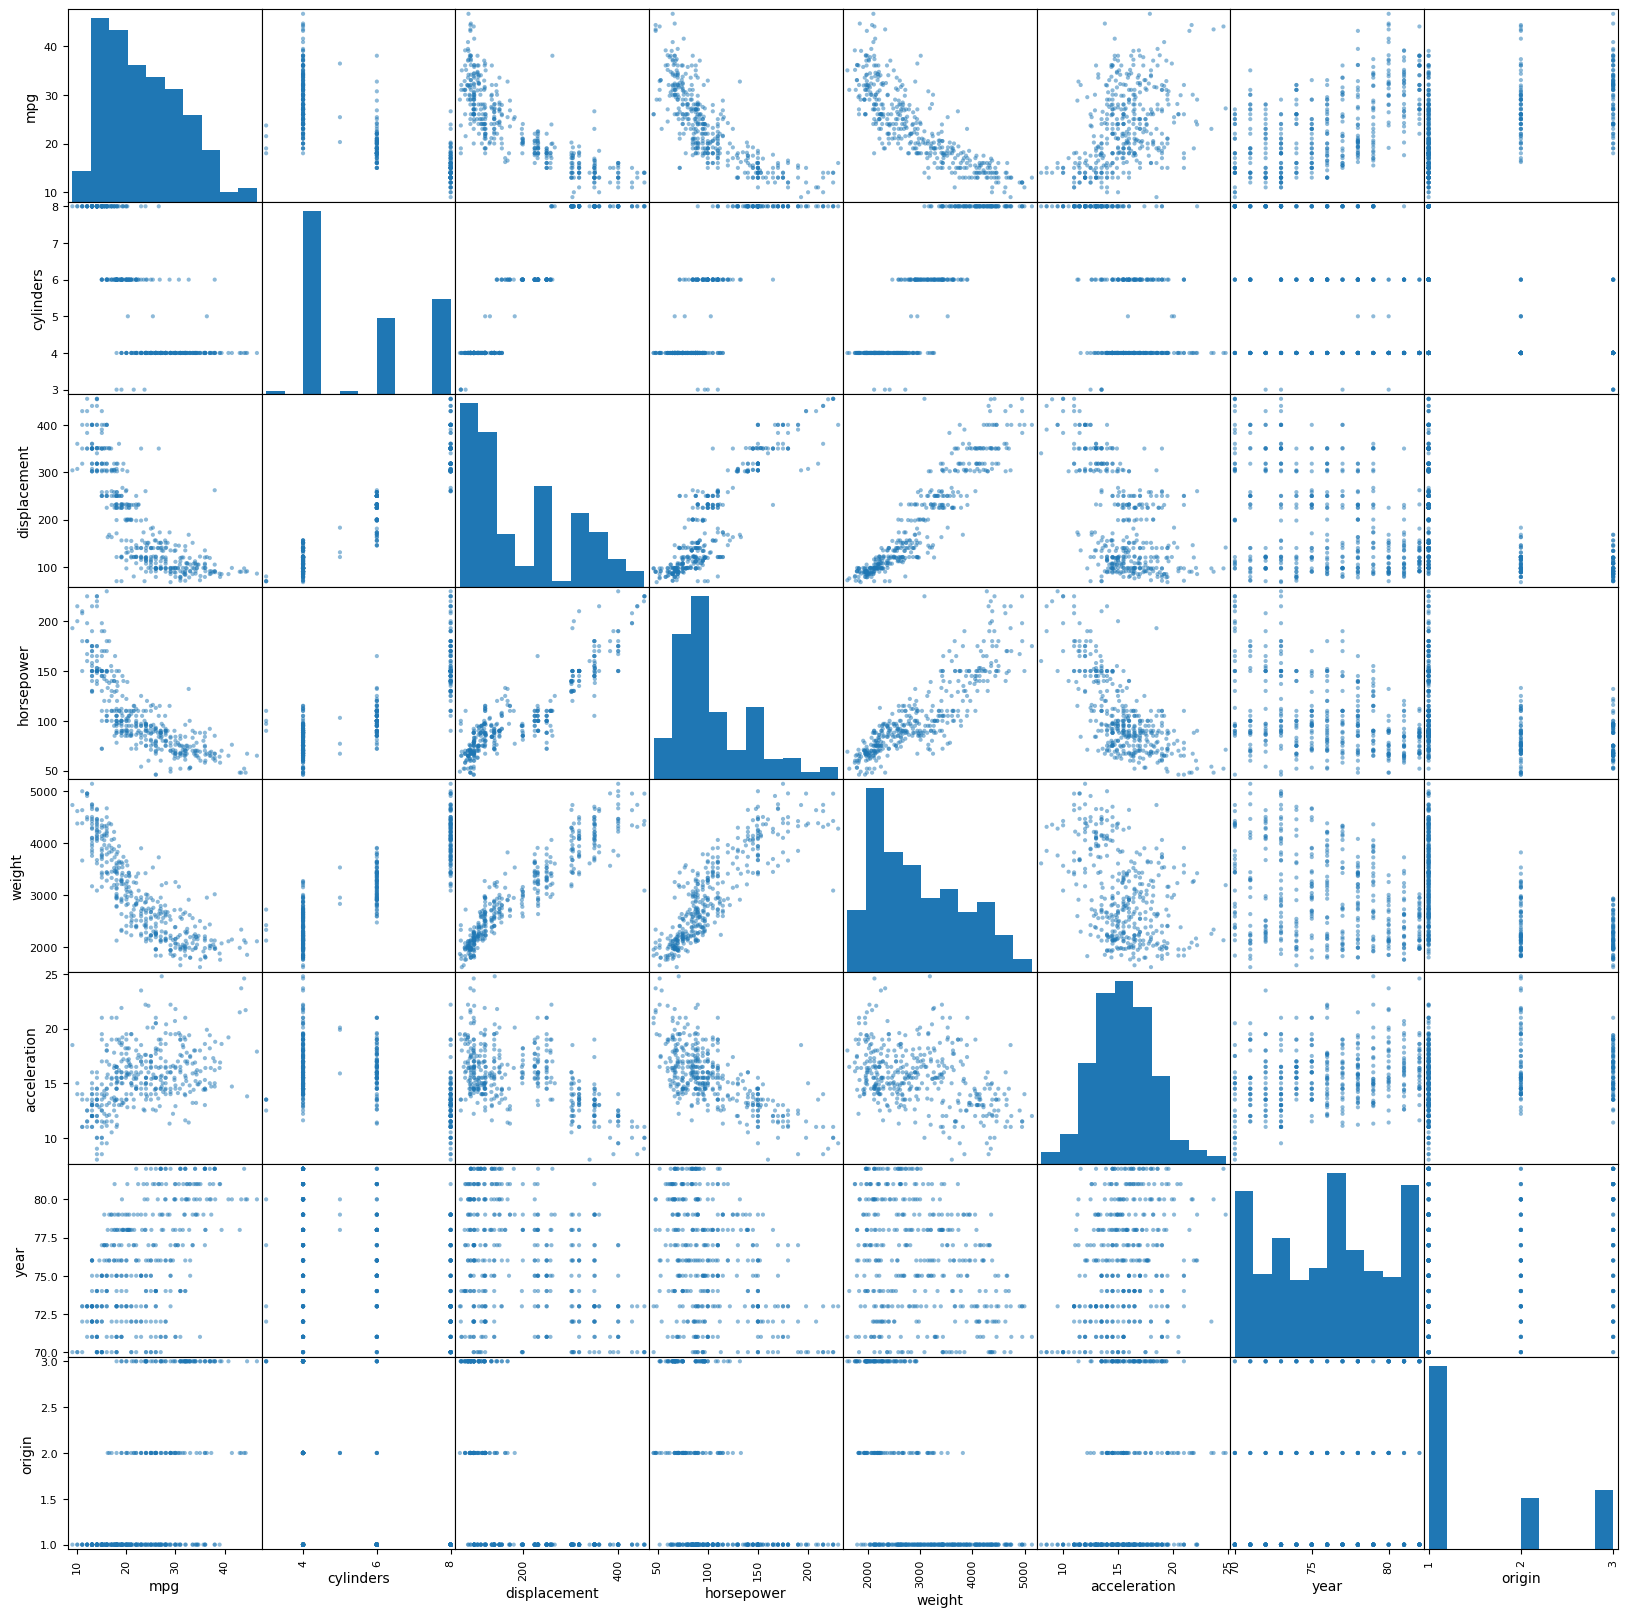

In [58]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(dpi=100, figsize=(20, 20));
pd.plotting.scatter_matrix(auto_dataset, ax=plt.gca());


(b) Compute the matrix of correlations between the variables using
the `DataFrame.corr()` method. 


In [59]:
auto_dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


<Axes: >

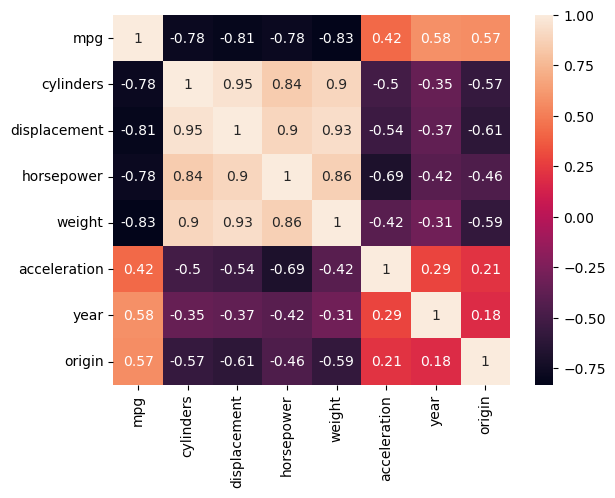

In [60]:
sns.heatmap(auto_dataset.corr(), annot=True)


(c) Use the `smf.OLS()` function to perform a multiple linear regression
with `mpg` as the response and all other variables except name as
the predictors. Use the `summarize()` function to print the results.
Comment on the output. For instance:
    
* i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.
* ii. Which predictors appear to have a statistically signifcant relationship to the response?
* iii. What does the coefcient for the `year` variable suggest?


In [61]:
from statsmodels.formula.api import ols

model = ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin', 
                auto_dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          2.04e-139
Time:                        22:35:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from statsmodels.stats.anova import anova_lm
anova_lm(model)

# 1) one can see that cylinders, year, displacement, weight, horsepower and origin has
#    significant effect on the response variable mpg. Acceleration has no significant
#    effect.
# 2) cylinders has the most effect on the response
# 3) The coefficient of year suggested by the model is 0.7508

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.00,14403.08,14403.08,1300.68,0.00
displacement,1.00,1073.34,1073.34,96.93,0.00
horsepower,1.00,403.41,403.41,36.43,0.00
weight,1.00,975.72,975.72,88.11,0.00
acceleration,1.00,0.97,0.97,0.09,0.77
year,1.00,2419.12,2419.12,218.46,0.00
origin,1.00,291.13,291.13,26.29,0.00
Residual,384.00,4252.21,11.07,NaN,NaN



(d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?


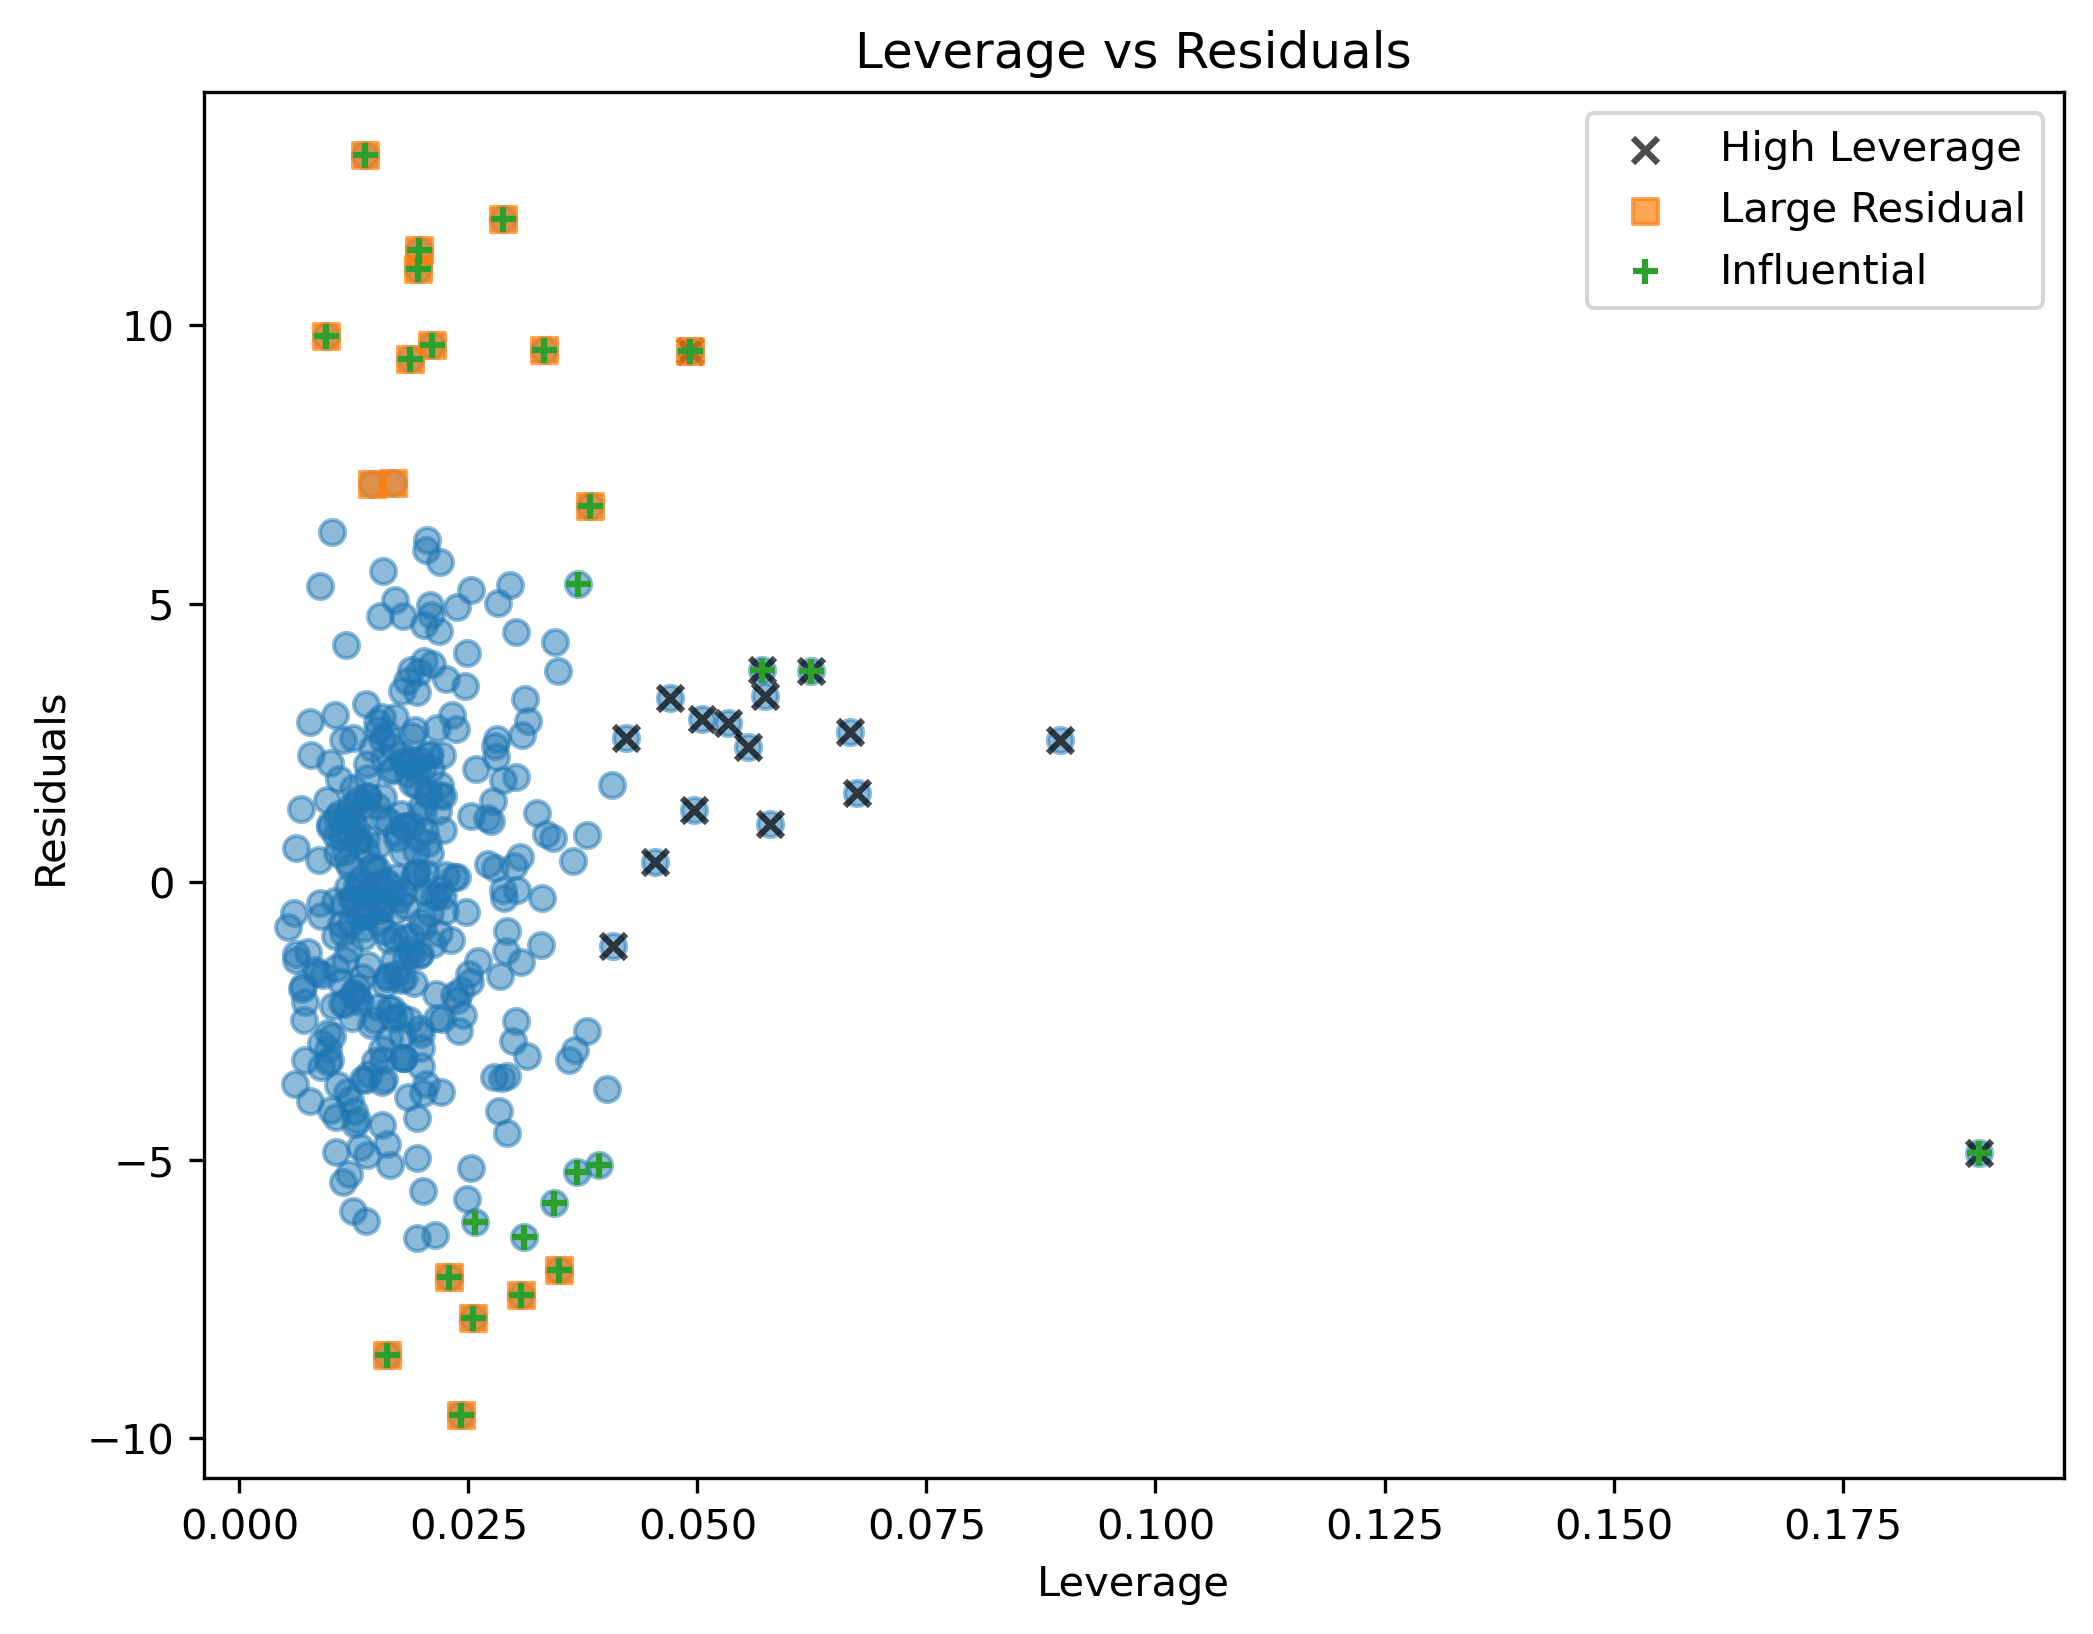

In [204]:
# try plotting the residual, leverage, and influence of the data to the model

import numpy as np
 
infl = model.get_influence()
leverage = infl.hat_matrix_diag
cooks_d = infl.cooks_distance[0]

ax = plt.subplots(figsize=(8,6), dpi=300)[1]
ax.scatter(leverage, model.resid, alpha=0.5)
ax.set_xlabel('Leverage')
ax.set_ylabel('Residuals')
ax.set_title('Leverage vs Residuals')

high_leverage = leverage > 2 * leverage.mean()
large_resid = np.abs(model.resid) > 2 * np.std(model.resid)
influential = cooks_d > 4 / len(model.resid)  # 经验阈值
ax.scatter(leverage[high_leverage], model.resid[high_leverage], marker='x', color="black", alpha=0.7, label='High Leverage')
ax.scatter(leverage[large_resid], model.resid[large_resid], marker='s', label='Large Residual', alpha=0.7)
ax.scatter(leverage[influential], model.resid[influential], marker='+', label='Influential')
ax.legend()

# one can see that there are a few data points have at least one of these properties: high liverage, large residual 
# and influential, which possibly affects the model negatively.

In [220]:
drop_indices = influential.reshape(-1) + large_resid.values.reshape(-1) + high_leverage.reshape(-1) >= 1
drop_indices.sum(), drop_indices.shape[0]

(40, 392)

In [222]:
auto_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,lr_pred_resid
name,,,,,,,,,
chevrolet chevelle malibu,18.00,8,307.00,130,3504,12.00,70,1,3.00
buick skylark 320,15.00,8,350.00,165,3693,11.50,70,1,1.00
plymouth satellite,18.00,8,318.00,150,3436,11.00,70,1,2.76
amc rebel sst,16.00,8,304.00,150,3433,12.00,70,1,0.94
ford torino,17.00,8,302.00,140,3449,10.50,70,1,2.03
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.00,4,140.00,86,2790,15.60,82,1,-1.32
vw pickup,44.00,4,97.00,52,2130,24.60,82,2,9.54
dodge rampage,32.00,4,135.00,84,2295,11.60,82,1,0.86


In [231]:
# perform VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df: pd.DataFrame) -> pd.DataFrame:
    vif_ = pd.DataFrame()
    vif_['index'] = df.columns
    vif_['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_

auto_dataset_dvif = auto_dataset.copy()
vif = get_vif(auto_dataset_dvif.drop(columns=["mpg"]))
vif

# one can see that there are in the feature columns there are features have high VIF values

,index,VIF
0,cylinders,117.71
1,displacement,96.91
2,horsepower,67.07
3,weight,139.45
4,acceleration,69.70
5,year,115.79
6,origin,8.47
7,lr_pred_resid,1.00



(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically signifcant?


In [ ]:
from itertools import combinations
from ISLP.models import ModelSpec as MS

# we try to add all the 2-combinations of the features and perform linear regression.
features = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
comb_features = list(combinations(features, 2))

y = auto_dataset["mpg"]
X = MS(features + comb_features).fit_transform(auto_dataset)

model = smf.OLS(y, X).fit()

model.summary()

# R^2 is higher than the original model.
# Significant Interactions:
#  - displacement:year
#  - acceleration:year
#  - acceleration:origin

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          4.01e-155
Time:                        01:33:05   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [243]:
# Reduce the combination to:
#  - displacement:year
#  - acceleration:year
#  - acceleration:origin

comb_features = [('displacement', 'year'),
                 ('acceleration', 'year'),
                 ('acceleration', 'origin')]

y = auto_dataset["mpg"]
X = MS(features + comb_features).fit_transform(auto_dataset)

model = smf.OLS(y, X).fit()

model.summary()

# one can see that the R^2 is still better than base model, and only reduce a little compared
# to the previous one (0.89)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.4
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          6.66e-153
Time:                        01:45:43   Log-Likelihood:                -982.93
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     381   BIC:                             2032.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              11.8757     27.471      0.432      0.666     -42.139      65.890
cylinders              -0.1269      0.303     -0.419      0.675      -0.722       0.468
displacement            0.1708      0.043      3.969      0.000       0.086       0.255
horsepower             -0.0371      0.013     -2.921      0.004      -0.062      -0.012
weight                 -0.0049      0.001     -7.868      0.000      -0.006      -0.004
acceleration           -3.6460      1.430     -2.549      0.011      -6.458      -0.834
year                    0.5476      0.356      1.538      0.125      -0.153       1.248
origin                 -7.0940      1.583     -4.483      0.000     -10.206      -3.982
displacement:year      -0.0023      0.001     -3.994      0.000      -0.003      -0.001
acceleration:year       0.0375      0.019      2.010      0.045       0.001       0.074
acceleration:origin     0.5078      0.096      5.304      0.000       0.320       0.696
==============================================================================
Omnibus:                       40.249   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.706
Skew:                           0.616   Prob(JB):                     1.63e-16
Kurtosis:                       4.712   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


(f) Try a few diferent transformations of the variables, such as
$\log(X)$, $\sqrt{X}$, $X^2$. Comment on your fndings.

In [77]:
import numpy as np

features_o = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
features_log = [f"np.log({i}+1e-6)" for i in features_o]
features_sr = [f"np.power({i}, 2)" for i in features_o]
features_sqrt = [f"np.sqrt({i})" for i in features_o]


log_model = ols(f"mpg~{'+'.join(features_log)}", 
                auto_dataset).fit()
square_model = ols(f"mpg~{'+'.join(features_sr)}", 
                auto_dataset).fit()
sqrt_model = ols(f"mpg~{'+'.join(features_sqrt)}",
                auto_dataset).fit()

In [78]:
log_model.summary()

# Compared to linear model:
# 1) Higher R^2 value
# 2) Lower AIC and BIC
# 3) Higher F-statistic
# 4) Higher log-likelihood

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          6.67e-153
Time:                        22:53:03   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -66.5643     17.505     -3.803      0.000    -100.982     -32.146
np.log(cylinders + 1e-6)        1.4818      1.659      0.893      0.372      -1.780       4.743
np.log(displacement + 1e-6)    -1.0551      1.538     -0.686      0.493      -4.080       1.970
np.log(horsepower + 1e-6)      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
np.log(weight + 1e-6)         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
np.log(acceleration + 1e-6)    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
np.log(year + 1e-6)            54.9857      3.555     15.465      0.000      47.995      61.976
np.log(origin + 1e-6)           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
anova_lm(log_model)

# All features are significant
# The top 3 features remains the same

,df,sum_sq,mean_sq,F,PR(>F)
np.log(cylinders + 1e-6),1.00,14373.47,14373.47,1526.48,0.00
np.log(displacement + 1e-6),1.00,1987.84,1987.84,211.11,0.00
np.log(horsepower + 1e-6),1.00,898.82,898.82,95.46,0.00
np.log(weight + 1e-6),1.00,421.48,421.48,44.76,0.00
np.log(acceleration + 1e-6),1.00,190.97,190.97,20.28,0.00
np.log(year + 1e-6),1.00,2239.39,2239.39,237.83,0.00
np.log(origin + 1e-6),1.00,91.24,91.24,9.69,0.00
Residual,384.00,3615.78,9.42,NaN,NaN


In [80]:
square_model.summary()

# Lower R^2 value
# Higher AIC and BIC
# Lower F-statistic
# Lower log-likelihood

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          3.57e-129
Time:                        22:53:11   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.2080      2.356      0.513      0.608      -3.424       5.840
np.power(cylinders, 2)       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
np.power(displacement, 2)   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
np.power(horsepower, 2)   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
np.power(weight, 2)       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
np.power(acceleration, 2)     0.0063      0.003      2.334      0.020       0.001       0.012
np.power(year, 2)             0.0050      0.000     14.160      0.000       0.004       0.006
np.power(origin, 2)           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
anova_lm(square_model)

# All features are significant
# The top 2 features remains the same

,df,sum_sq,mean_sq,F,PR(>F)
"np.power(cylinders, 2)",1.00,14135.32,14135.32,1128.52,0.00
"np.power(displacement, 2)",1.00,278.51,278.51,22.24,0.00
"np.power(horsepower, 2)",1.00,215.99,215.99,17.24,0.00
"np.power(weight, 2)",1.00,1283.06,1283.06,102.44,0.00
"np.power(acceleration, 2)",1.00,54.17,54.17,4.32,0.04
"np.power(year, 2)",1.00,2595.55,2595.55,207.22,0.00
"np.power(origin, 2)",1.00,446.60,446.60,35.65,0.00
Residual,384.00,4809.80,12.53,NaN,NaN


In [68]:
sqrt_model.summary()

# Higher R^2 value
# Lower AIC and BIC
# Higher F-statistic
# Higher log-likelihood

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          2.17e-145
Time:                        22:35:37   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -49.7981      9.178     -5.426      0.000     -67.844     -31.752
np.sqrt(cylinders)       -0.2370      1.538     -0.154      0.878      -3.260       2.786
np.sqrt(displacement)     0.2258      0.229      0.984      0.326      -0.225       0.677
np.sqrt(horsepower)      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
np.sqrt(weight)          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
np.sqrt(acceleration)    -0.8253      0.834     -0.989      0.323      -2.466       0.815
np.sqrt(year)            12.7903      0.859     14.891      0.000      11.102      14.479
np.sqrt(origin)           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
anova_lm(sqrt_model)

# All features are significant
# The top 3 features remains the same

,df,sum_sq,mean_sq,F,PR(>F)
np.sqrt(cylinders),1.00,14430.29,14430.29,1400.16,0.00
np.sqrt(displacement),1.00,1643.22,1643.22,159.44,0.00
np.sqrt(horsepower),1.00,609.59,609.59,59.15,0.00
np.sqrt(weight),1.00,648.26,648.26,62.90,0.00
np.sqrt(acceleration),1.00,69.84,69.84,6.78,0.01
np.sqrt(year),1.00,2274.33,2274.33,220.68,0.00
np.sqrt(origin),1.00,185.90,185.90,18.04,0.00
Residual,384.00,3957.56,10.31,NaN,NaN


---

## Additional Coding Task: Bias-variance tradeoff

Consider the ground truth model:

$$y = \sin(2x)$$

Generate $n_{\text{train}} = 50$ training samples with random noise $\mathcal{N}(0, 0.5^2)$ and test data with sample size $n_{\text{test}} = 500$. Suppose there are 
predictors $\{x_i\}_{i=1}^p$, where $\{x_j: j \ne 1\}$ is a set of noisy predictors that are unrelated to $y$. Apply linear regression and KNN regression to
predict $y$ in the test set and analyze the bias-variance trade-off for both models. Vary $p \in \{1, 2, 3, 4, 10, 20\}$ and $k = 1, ..., 9$ for KNN.
Visualize the patterns of bias-variance trade-off. For your reference, the pattern of mean square error should be similar to FIGURE 3.20 (page 110) in the reference book.

In [ ]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.neighbors import KNeighborsRegressor # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore

n_train = 50  # Training
n_test = 500  # Test
n_rep = 100  # Repeat 100 times
p = 20
p_use = np.array([1, 2, 3, 4, 10, 20])  # Number of predictors
k = np.arange(1, 10)

sigma = 0.5

X_train = np.random.uniform(-1, 1, [n_train, p])
X_test = np.random.uniform(-1, 1, [n_test, p])
y0 = np.sin(2 * X_train[:, 0])  # Only the first predictor is related to y
y_test = np.sin(2 * X_test[:, 0])

out_knn = pd.DataFrame()  # Output results
out_lm = pd.DataFrame()

for i in range(len(p_use)):
    yhat_lm = np.zeros((n_test, n_rep))
    yhat_knn = np.zeros((n_test, n_rep, len(k)))
    
    for l in range(n_rep):
        y = y0 + np.random.normal(0, sigma, n_train)
    
        ######### DO: fit linear regression using LinearRegression funciton, assign predicted value to yhat_lm[:, [l]] #########
        fit_lm = LinearRegression().fit(X_train[:, :p_use[i]], y)
        yhat_lm[:, l] = fit_lm.predict(X_test[:, :p_use[i]]) # Predicted value
    
        for j in range(len(k)):
            
            ######### DO: fit knn using KNeighborsRegressor funciton, assign predicted value to yhat_knn[:, l, j] #########
            fit_knn = KNeighborsRegressor(n_neighbors=k[j]).fit(X_train[:, :p_use[i]], y)
            yhat_knn[:, l, j] = fit_knn.predict(X_test[:, :p_use[i]])  # Predicted value
        
        
        print(i + 1, "-th p, ", l + 1, "-th repetition finished. \n")
    
  
    ######### DO: compute bias and variance of linear regression #########
    
    # Compute mean of predicted values
    ybar_lm = np.mean(yhat_lm, axis=-1, keepdims=True) # E(f^hat)
    
    # Compute bias^2
    biasSQ_lm = np.mean((y_test - ybar_lm)**2) # E[ (f - E(f^hat))^2 ]
    
    # Compute variance
    variance_lm = np.mean(np.var(yhat_lm)**2) # E[ (E(f^hat) - f^hat)^2 ]
    
    # Compute total MSE
    err_lm = np.mean((y_test[..., None] - yhat_lm)**2, axis=None)

    out_lm = pd.concat([out_lm, pd.DataFrame({'biasSQ_lm': [biasSQ_lm], 'variance_lm': [variance_lm], 'MSE': [err_lm], 'p': [p_use[i]]})])

    
    ######### DO: compute bias and variance of knn regression #########
    for j in range(len(k)):
            
        # Compute mean of predicted values
        ybar_knn = np.mean(yhat_knn[..., j], axis=-1, keepdims=True) # E(f^hat)

        # Compute bias^2
        biasSQ_knn = np.mean((y_test - ybar_knn)**2) # E[ (f - E(f^hat))^2 ]

        # Compute variance
        variance_knn = np.mean(np.var(yhat_knn[..., j])**2) # E[ (E(f^hat) - f^hat)^2 ]

        # Compute total MSE
        err_knn = np.mean((y_test[..., None] - yhat_knn[..., j])**2, axis=None)

        out_knn = pd.concat([out_knn, pd.DataFrame({'biasSQ_knn': [biasSQ_knn], 'variance_knn': [variance_knn], 
                                                    'MSE': [err_knn], '1/K': [1 / k[j]], 'p': [p_use[i]]})])

In [144]:
out_lm

,biasSQ_lm,variance_lm,MSE,p
0,1.19,0.38,0.04,1
0,1.18,0.38,0.05,2
0,1.17,0.38,0.05,3
0,1.18,0.40,0.06,4
0,1.16,0.42,0.11,10
0,1.14,0.58,0.25,20


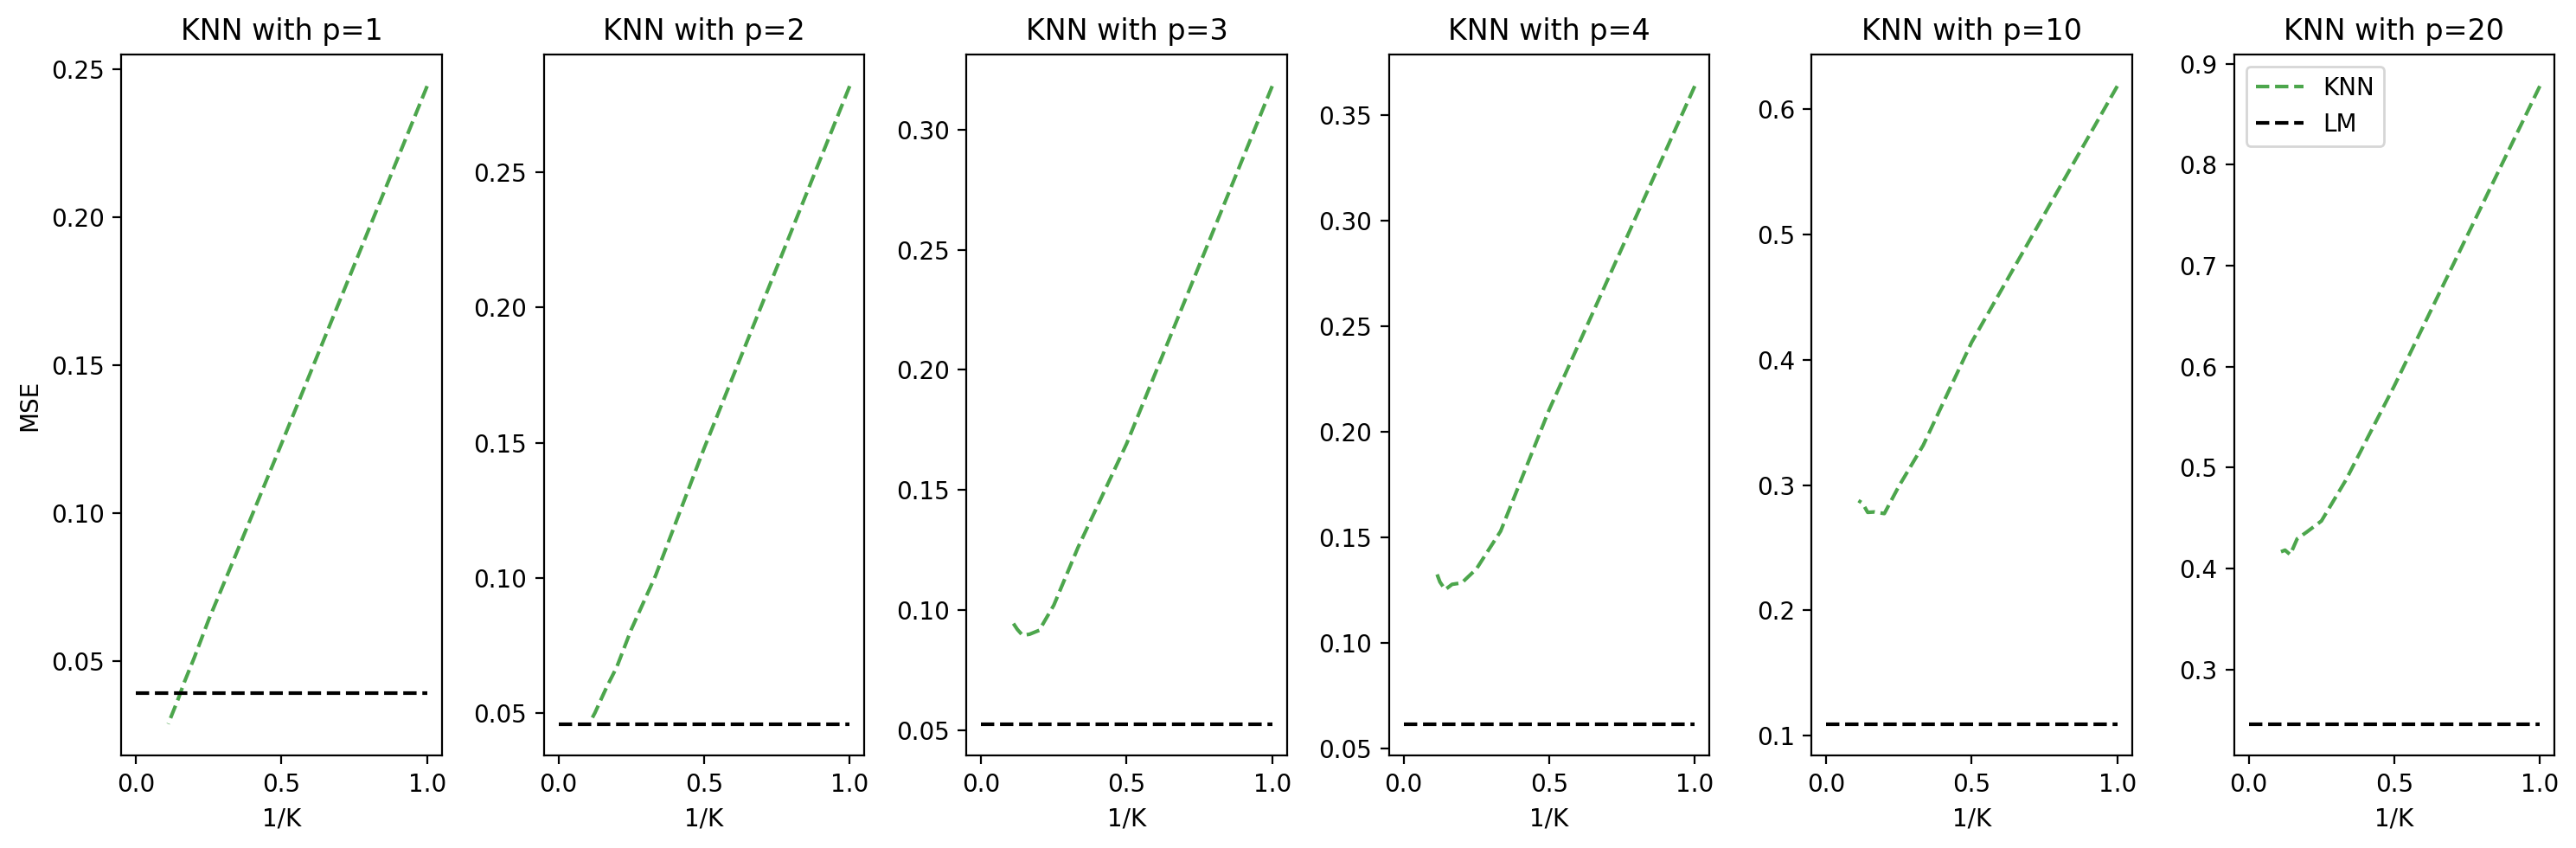

In [158]:
plt.figure(figsize=(15, 5), dpi=200)

for idx, p in enumerate(p_use):
    plt.subplot(1, 6, idx+1)
    res = out_knn[out_knn["p"] == p]
    
    plt.plot(res['1/K'], res["MSE"], "g--", label="KNN", alpha=0.7)
    plt.hlines(out_lm[out_lm["p"] == p]["MSE"], 0, 1, color="black", linestyles="--", label="LM")

    if idx == 0:
        plt.ylabel('MSE')
    plt.xlabel('1/K')
    plt.title(f'KNN with p={p}')

    if idx == 5:
        plt.legend()

plt.tight_layout()